In [1]:
### ValDXer testing
import os
os.environ["HDXER_PATH"] = "/home/alexi/Documents/HDXer"

from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings
import pandas as pd
import MDAnalysis as mda
from MDAnalysis.coordinates.XTC import XTCWriter

from pdbfixer import PDBFixer
from openmm.app import PDBFile
settings = Settings(name='test_full0.5')
settings.replicates = 1
settings.gamma_range = (2,6)
settings.train_frac = 0.5
settings.RW_exponent = [0]
settings.split_mode = 'R3'
settings.stride = 1000
# settings.HDXer_stride = 10000

settings.RW_do_reweighting = False
settings.RW_do_params = True
import pickle

VDX = ValDXer(settings)
expt_name = 'Experimental'
test_name = "MBPwt1_test"

from icecream import ic

ic.disable()

/home/alexi/Documents/ValDX


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
Experiment name test_full0.5 already exists. Attempting t

In [2]:
# ### add code to read in sequence from CIF file instead of copying it manually

# cif_file = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/MBP/MaltoseBindingProtein/AF-P0AEX9-F1-model_v4.cif"

# sequence_header = "_entity_poly.pdbx_seq_one_letter_code"
# sequence = ""
# seq_head_idx = 0
# with open(cif_file, 'r') as f:
#     lines = f.readlines()
#     for idx, line in enumerate(lines):
#         if sequence_header in line:
#             seq_head_idx = idx+1
#             break
    
#     for idx, line in enumerate(lines[seq_head_idx:]):
#         if idx > 0 and line[0] == ";":
#             break
#         sequence += line.strip()


# # print(sequence)



# # strip sequence of non letters
# sequence = ''.join([i for i in sequence if i.isalpha()])

# print(sequence)

# print("Sequence length: ", len(sequence))


# # convert sequence to FASTA format
# def write_fasta(sequence, header, file_name):
#     """
#     Writes a single-letter amino acid sequence to a FASTA file.
    
#     Parameters:
#     - sequence: A string containing the amino acid sequence.
#     - header: A string to be used as the header in the FASTA file.
#     - file_name: The name of the FASTA file to be created.
#     """
#     print(f"Writing sequence to {file_name}")
#     with open(file_name, 'w') as fasta_file:
#         # Write the header with the '>' symbol
#         fasta_file.write(f">{header}\n")
        
#         # Write the sequence in lines of 80 characters
#         for i in range(0, len(sequence), 80):
#             fasta_file.write(sequence[i:i+80] + "\n")


In [3]:

# fasta_path = os.path.join("raw_data", "MBP", 'MBP_wt.fasta')
# write_fasta(sequence, 'MBP_wt', fasta_path)



In [4]:
# raw_hdx_path = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/MBP/MaltoseBindingProtein/MBP analysis final editing export 2020 10 05_tidy.csv"
# raw_hdx = pd.read_csv(raw_hdx_path)
# raw_hdx.tail()

In [5]:
# state = "WT Null"

# raw_hdx = raw_hdx[raw_hdx['hx_sample'] == state]

# # drop nans in column d
# raw_hdx = raw_hdx.dropna(subset=['d'])

# raw_hdx.head()


In [6]:
# # group by pep_start and pep_end and hx_time and take the mean of the d values
# grouped = raw_hdx.groupby(['pep_start', 'pep_end',"hx_time"])["d"].mean().reset_index()

# grouped.head()

# # assign peptide number to each combination of pep_start and pep_end
# grouped['peptide']= grouped.groupby(['pep_start', 'pep_end']).ngroup()



In [7]:
# # print entire dataframe
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)

# print(grouped)


In [8]:
# # add MaxUptake column for each peptide

# # first, get the max uptake for each peptide
# max_uptake = grouped.groupby('peptide')['d'].max().reset_index()

# # assign the max uptake to each peptide
# grouped = grouped.merge(max_uptake, on='peptide', suffixes=('', '_max'))

# grouped.head()

In [9]:
# grouped['UptakeFraction'] = grouped['d'] / grouped['d_max']



# columns_to_drop = ['d', 'd_max']
# grouped = grouped.drop(columns=columns_to_drop)

# grouped.head()

In [10]:

# # pivot exposure and uptake fraction
# grouped = grouped.pivot(index=['pep_start', 'pep_end'], columns='hx_time', values='UptakeFraction').reset_index()

# # drop 
# grouped.head()


In [11]:

# # print entire dataframe
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# print(grouped)

In [12]:
# # conver to HDXer format ie start, end, exposure_1, exposure_2 

# # change Start to ResStr and End to ResEnd
# hdx = grouped.rename(columns={'pep_start': 'ResStr', 'pep_end': 'ResEnd'})

# # drop the exposure column
# hdx.columns.name = None

# print(hdx)


In [13]:

# hdx = hdx.round(5)
# hdx.to_csv(os.path.join("raw_data", "MBP", 'MBP_wt1.dat'), sep=' ', index=False)


In [14]:
# segs = hdx[['ResStr', 'ResEnd']].drop_duplicates().sort_values(by=['ResStr', 'ResEnd']).reset_index(drop=True)


In [15]:

# # convert to list of tuples
# segs = [tuple(x) for x in segs.values]

# print(segs)


In [16]:


# # write list as new lines with space delimiter
# with open(os.path.join("raw_data", "MBP", 'MBP_wt1_segs.txt'), 'w') as f:
#     for item in segs:
#         f.write("%s\n" % ' '.join(map(str, item)))

In [17]:

# BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/MBP/MaltoseBindingProtein"
# sim_dir = os.path.join(BPTI_dir, "alphafold_quick")

# pdb_list = [f for f in os.listdir(sim_dir) if f.endswith('.pdb')]

# print(pdb_list) 


# H_sim_dir = os.path.join(BPTI_dir, "alphafold_H")

# os.makedirs(H_sim_dir, exist_ok=True)

# for pdb in pdb_list:
#     fixer = PDBFixer(os.path.join(sim_dir, pdb))
#     fixer.addMissingHydrogens(7.0)
#     H_pdb_name = pdb.replace('.pdb', '_H.pdb')
#     PDBFile.writeFile(fixer.topology, fixer.positions, open(os.path.join(H_sim_dir, H_pdb_name), 'w'), keepIds=True)

# pdb_list = [f for f in os.listdir(H_sim_dir) if f.endswith('.pdb')]



Generate conformations with Alphafold

# need to find out how to generate a wide range of conformations

In [18]:
def pre_process_main():
    # BPTI data
    # BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/MBP/MaltoseBindingProtein"
    BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/MBP/MaltoseBindingProtein"
    # BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"

    sim_name = 'MBPwt_AF'
    os.listdir(BPTI_dir)

    segs_name = "MBP_wt1_segs.txt"
    segs_path = os.path.join(BPTI_dir, segs_name)

    hdx_name = "MBP_wt1.dat"
    hdx_path = os.path.join(BPTI_dir, hdx_name)
    print(hdx_path)

    rates_name = "out__train_MD_Simulated_1Intrinsic_rates.dat"
    rates_path = os.path.join(BPTI_dir, rates_name)

    sim_dir = os.path.join(BPTI_dir, "alphafold_quick")

    pdb_list = [f for f in os.listdir(sim_dir) if f.endswith('.pdb')]

    print(pdb_list) 


    H_sim_dir = os.path.join(BPTI_dir, "alphafold_H")

    os.makedirs(H_sim_dir, exist_ok=True)

    for pdb in pdb_list:
        continue
        fixer = PDBFixer(os.path.join(sim_dir, pdb))
        fixer.addMissingHydrogens(7.0)
        H_pdb_name = pdb.replace('.pdb', '_H.pdb')
        PDBFile.writeFile(fixer.topology, fixer.positions, open(os.path.join(H_sim_dir, H_pdb_name), 'w'), keepIds=True)

    pdb_list = [f for f in os.listdir(H_sim_dir) if f.endswith('.pdb')]


    top_path = "/home/alexi/Documents/ValDX/raw_data/MBP/MBP_wt_protonated.pdb"

    # pdb_paths = [os.path.join(H_sim_dir, i) for i in pdb_list]

    # print(top_path)
    # print(pdb_paths)


    # small_traj_name = top_path.replace(".pdb","_small.xtc")
    # small_traj_path = os.path.join(sim_dir, small_traj_name)

    # u = mda.Universe(top_path, pdb_paths)


        
    # with XTCWriter(small_traj_path, n_atoms=u.atoms.n_atoms) as W:
    #     for ts in u.trajectory:
    #             W.write(u.atoms)

    # traj_paths = [os.path.join(sim_dir, i) for i in os.listdir(sim_dir) if i.endswith(".pdb")]
    
    traj_paths = ["/home/alexi/Documents/ValDX/raw_data/MBP/MBP_wt_protonated.xtc"]

    print(traj_paths)
    return hdx_path, segs_path, rates_path, top_path, traj_paths, sim_name, expt_name, test_name


In [19]:
hdx_path, segs_path, rates_path, top_path, traj_paths, sim_name, expt_name, test_name = pre_process_main()

/home/alexi/Documents/ValDX/raw_data/MBP/MaltoseBindingProtein/MBP_wt1.dat
['MBP_wt_unrelaxed_rank_004_alphafold2_ptm_model_2_seed_000.pdb', 'MBP_wt_unrelaxed_rank_002_alphafold2_ptm_model_4_seed_000.pdb', 'MBP_wt_unrelaxed_rank_001_alphafold2_ptm_model_3_seed_000.pdb', 'MBP_wt_unrelaxed_rank_003_alphafold2_ptm_model_5_seed_000.pdb', 'MBP_wt_unrelaxed_rank_005_alphafold2_ptm_model_1_seed_000.pdb']
['/home/alexi/Documents/ValDX/raw_data/MBP/MBP_wt_protonated.xtc']


In [20]:
# ic.disable()
combined_analysis_dump, names, save_paths = VDX.run_benchmark_ensemble(system=test_name,
                                                                    times=[30, 240, 1800, 14400],
                                                                    expt_name=expt_name,
                                                                    n_reps=1,
                                                                    optimise=False,
                                                                    # split_modes=['r'],
                                                                    hdx_path=hdx_path,
                                                                    segs_path=segs_path,
                                                                    traj_paths=traj_paths,
                                                                    top_path=top_path)

(2, 6)
Running benchmark for test_full0.5
Running r split mode
envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_h

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_meth

/home/alexi/Documents/ValDX/data/test_full0.5_r_naive_random9/train_MBPwt1_test_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/test_full0.5_r_naive_random9/train_MBPwt1_test_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/test_full0.5_r_naive_random9/train_MBPwt1_test_1/reweighting_gamma_5x10^0/home/alexi/Documents/ValDX/data/test_full0.5_r_naive_random9/train_MBPwt1_test_1/reweighting_gamma_4x10^0



Contacts readContacts readContacts read


Hbonds readHbonds readHbonds readContacts read



Hbonds read
Segments and experimental dfracs read
Segments and experimental dfracs readSegments and experimental dfracs read

Segments and experimental dfracs read
Sum of Output WeightsSum of Output WeightsSum of Output Weights


0.99999999999999990.99999999999999990.9999999999999999


Sum of Output Weights
0.9999999999999999
Finished reweighting
[(array([0.00909091, 0.00909091, 0.00909091, 0.00909091, 0.00909091,
       0.00909091, 0.00909091, 0.00909091, 0.00909091, 0.00909

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_MBPwt1_test_1
     ResStr  ResEnd  peptide
0        19      30        0
1        19      31        1
2        24      35        2
3        31      53        3
4        32      46        4
..      ...     ...      ...
110     357     372      110
111     362     370      111
112     362     372      112
113     362     377      113
114     370     377      114

[115 rows x 3 columns]
Residues for recalculation: [ 19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 15

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

Recalculating val_MBPwt1_test_1
    ResStr  ResEnd  peptide                                               path
0       19      31        1  /home/alexi/Documents/ValDX/data/test_full0.5_...
1       24      35        2  /home/alexi/Documents/ValDX/data/test_full0.5_...
2       31      53        3  /home/alexi/Documents/ValDX/data/test_full0.5_...
3       55      72        6  /home/alexi/Documents/ValDX/data/test_full0.5_...
4       73      81        8  /home/alexi/Documents/ValDX/data/test_full0.5_...
5       82      87       13  /home/alexi/Documents/ValDX/data/test_full0.5_...
6       87     100       14  /home/alexi/Documents/ValDX/data/test_full0.5_...
7       87     107       17  /home/alexi/Documents/ValDX/data/test_full0.5_...
8       88     107       20  /home/alexi/Documents/ValDX/data/test_full0.5_...
9       96     106       21  /home/alexi/Documents/ValDX/data/test_full0.5_...
10     106     114       23  /home/alexi/Documents/ValDX/data/test_full0.5_...
11     108     114  

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(296,)
[ 0.64409091  0.54318182  0.53136364  0.76681818  0.92590909  1.19
  2.09772727  3.85909091  3.71090909  5.31818182  4.70363636  2.55818182
  5.50681818  8.88181818 13.10227273 11.64409091 15.77045455 15.93954545
 14.03681818 11.32409091  6.32863636  3.68454545  7.91272727 11.17454545
 10.59454545  6.57363636 11.66818182 13.37045455 10.83909091  9.29454545
  9.69954545 12.77363636 12.01409091  9.80909091 13.42272727  8.68818182
  8.34045455  9.62272727  7.03454545  6.88454545  8.94136364  8.97227273
  9.25090909  6.74227273 10.82545455  8.79136364  1.23454545  2.76363636
  7.64772727  7.33954545  6.62136364  8.78227273 11.62409091  5.21727273
  9.71136364 14.32181818  7.33727273  4.78318182  6.26409091  8.32227273
 10.90636364 11.23272727 12.585      14.23454545 11.47136364 11.64227273
  7.83045455 12.06318182  7.94818182  8.53363636 10.89545455 12.96136364
 12.19181818  9.57818182 14.155       8.29818182  6.13181818  5.655
  8.75727273  9.01409091 10.75863636

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

KeyboardInterrupt: 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Coords shape
(110, 1188)
Performing PCA
Transformed data
(110, 2)
Fitting KMeans
Getting cluster centers
(55, 2)
Getting cluster labels
(110,)
Unique labels
(55,)
Cluster frames
[2, 57, 11, 15, 5, 24, 34, 14, 0, 37, 29, 93, 109, 70, 36, 98, 8, 85, 94, 72, 3, 71, 108, 61, 33, 65, 28, 80, 21, 102, 49, 59, 19, 91, 31, 22, 95, 69, 68, 12, 44, 43, 20, 78, 101, 42, 40, 52, 23, 13, 84, 39, 30, 4, 46]
55
Cluster weights
[0.5 3.  2.  0.5 0.5 2.5 1.  0.5 0.5 1.5 0.5 0.5 1.5 1.  2.  1.5 1.  1.
 1.  0.5 1.  0.5 2.  2.5 1.5 0.5 0.5 1.  3.5 1.  0.5 1.5 0.5 0.5 0.5 0.5
 0.5 1.  0.5 0.5 1.  1.  1.  0.5 1.  1.5 0.5 0.5 0.5 0.5 1.  0.5 1.  0.5
 0.5]
(55,)


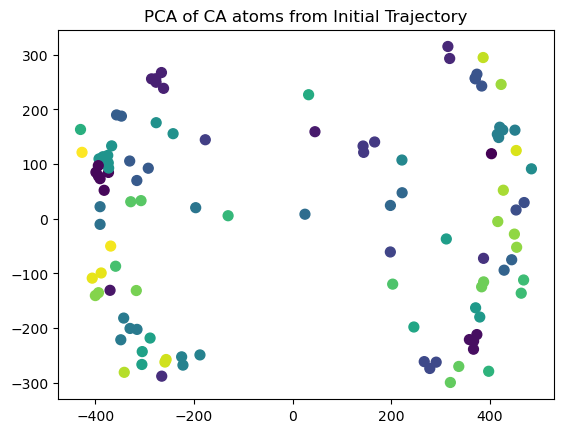

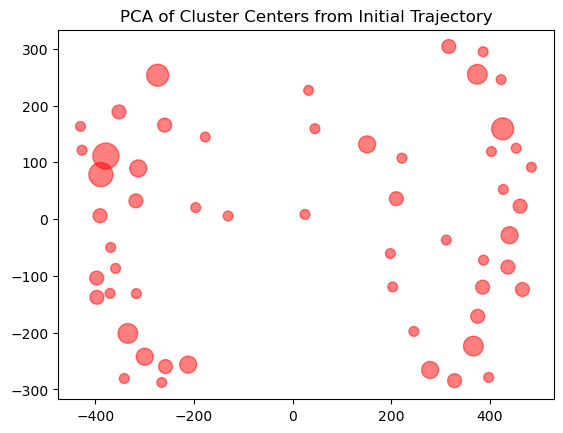

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:241: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


(2, 6)
Running benchmark for test_full0.5
Running r split mode
envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_h

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_meth

/home/alexi/Documents/ValDX/data/test_full0.5_r_naive_random10/train_MBPwt1_test_clustered_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/test_full0.5_r_naive_random10/train_MBPwt1_test_clustered_1/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/test_full0.5_r_naive_random10/train_MBPwt1_test_clustered_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/test_full0.5_r_naive_random10/train_MBPwt1_test_clustered_1/reweighting_gamma_5x10^0



Contacts readContacts readContacts readContacts read



Hbonds readHbonds readHbonds readHbonds read



Segments and experimental dfracs readSegments and experimental dfracs read
Segments and experimental dfracs read
Segments and experimental dfracs read

Sum of Output WeightsSum of Output WeightsSum of Output Weights
Sum of Output Weights
0.9999999999999998
0.9999999999999998

0.9999999999999998
0.9999999999999998

Finished reweighting
[(array([0.00909091, 0.05454545, 0.03636364, 0.00909091, 0.00909091,
       0.04545455,

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_MBPwt1_test_clustered_1
     ResStr  ResEnd  peptide
0        19      30        0
1        19      31        1
2        24      35        2
3        31      53        3
4        32      46        4
..      ...     ...      ...
110     357     372      110
111     362     370      111
112     362     372      112
113     362     377      113
114     370     377      114

[115 rows x 3 columns]
Residues for recalculation: [ 19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar d

Recalculating val_MBPwt1_test_clustered_1
    ResStr  ResEnd  peptide                                               path
0       19      31        1  /home/alexi/Documents/ValDX/data/test_full0.5_...
1       24      35        2  /home/alexi/Documents/ValDX/data/test_full0.5_...
2       31      53        3  /home/alexi/Documents/ValDX/data/test_full0.5_...
3       55      72        6  /home/alexi/Documents/ValDX/data/test_full0.5_...
4       73      81        8  /home/alexi/Documents/ValDX/data/test_full0.5_...
5       82      87       13  /home/alexi/Documents/ValDX/data/test_full0.5_...
6       87     100       14  /home/alexi/Documents/ValDX/data/test_full0.5_...
7       87     107       17  /home/alexi/Documents/ValDX/data/test_full0.5_...
8       88     107       20  /home/alexi/Documents/ValDX/data/test_full0.5_...
9       96     106       21  /home/alexi/Documents/ValDX/data/test_full0.5_...
10     106     114       23  /home/alexi/Documents/ValDX/data/test_full0.5_...
11     108

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(296,)
[ 0.79318182  0.67818182  0.56318182  0.81454545  1.00863636  1.17727273
  2.19409091  3.81681818  3.66409091  5.44863636  4.76818182  2.58045455
  5.42636364  8.85090909 12.98636364 11.63318182 15.715      15.82681818
 13.93272727 11.32181818  6.22681818  3.74818182  7.78227273 11.00909091
 10.58409091  6.54272727 11.58363636 13.31       10.76909091  9.32318182
  9.73454545 12.80227273 12.09363636  9.83681818 13.46090909  8.68181818
  8.38636364  9.61636364  7.01863636  6.84954545  8.84409091  8.955
  9.09363636  6.69454545 10.82636364  8.74681818  1.27909091  2.81772727
  7.76227273  7.51227273  6.74454545  8.81545455 11.61772727  5.20181818
  9.72454545 14.24        7.42545455  4.72954545  6.36136364  8.51272727
 10.80136364 11.21454545 12.49045455 14.18454545 11.51363636 11.72272727
  8.03727273 12.06090909  8.07227273  8.55772727 10.99318182 13.02590909
 12.25454545  9.51090909 14.13909091  8.345       6.16727273  5.67954545
  8.74227273  9.05545455 10.80

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(333,)
[ 0.79318182  0.67818182  0.56318182  0.81454545  1.00863636  1.17727273
  2.19409091  3.81681818  3.66409091  5.44863636  4.76818182  2.58045455
  5.42636364  8.85090909 12.98636364 11.63318182 15.715      15.82681818
 13.93272727 11.32181818  6.22681818  3.74818182  7.78227273 11.00909091
 10.58409091  6.54272727 11.58363636 13.31       10.76909091  9.32318182
  9.73454545 12.80227273 12.09363636  9.83681818 13.46090909 14.43772727
  8.68181818  8.38636364  9.61636364  7.01863636  6.84954545  8.84409091
  8.955       9.09363636  6.69454545 10.82636364  8.74681818  1.27909091
  2.81772727  7.76227273  7.51227273  6.74454545  8.81545455 11.61772727
  5.20181818  9.72454545 14.24        7.42545455  4.72954545  6.36136364
  8.51272727 10.80136364 11.21454545 12.49045455 14.18454545 11.51363636
 11.72272727  8.03727273 12.06090909  8.07227273  8.55772727 10.99318182
 13.02590909 12.25454545  9.51090909 14.13909091  8.345       6.16727273
  5.67954545  8.74227273 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


concat plot_df
plotting nan_df
nan_df
nan_df + expt_df
plotting MSE for nan_df
Finished evaluating HDX
     Bc   Bh                      calc_name
0  0.35  2.0  train_MBPwt1_test_clustered_1
Analysis dumped to results/MBPwt1_test_clustered/Benchmark/test_full0.5_r_naive_random/20240301-172610_analysis.csv
dict_keys(['test_full0.5_r_naive_random'])
dict_keys(['train_dfs', 'val_dfs', 'test_dfs', 'expt_df', 'merge_df', 'expt_segs', 'train_segs', 'val_segs', 'n_reps', 'times', 'expt_name', 'calc_name', 'train_rep_names', 'val_rep_names', 'HDX_data', 'train_gammas', 'val_gammas', 'weights', 'BV_constants', 'LogPfs'])
Key: train_dfs
<class 'list'>
Key: val_dfs
<class 'list'>
Key: test_dfs
<class 'list'>
Key: expt_df
<class 'pandas.core.frame.DataFrame'>
Adding test_full0.5_r_naive_random to df expt_df
Key: merge_df
<class 'pandas.core.frame.DataFrame'>
Adding test_full0.5_r_naive_random to df merge_df
Key: expt_segs
<class 'pandas.core.frame.DataFrame'>
Adding test_full0.5_r_naive_random to 

/home/alexi/Documents/ValDX/ValDX/ValidationDX.py:1408: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dump["name"] = [name]*len(dump)
/home/alexi/Documents/ValDX/ValDX/ValidationDX.py:1409: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dump["split_type"] = [self.settings.split_mode]*len(dump)
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:931: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
Experiment name test_full0.5_s_naive_sequential already e

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_meth

/home/alexi/Documents/ValDX/data/test_full0.5_s_naive_sequential4/train_MBPwt1_test_clustered_1/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/test_full0.5_s_naive_sequential4/train_MBPwt1_test_clustered_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/test_full0.5_s_naive_sequential4/train_MBPwt1_test_clustered_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/test_full0.5_s_naive_sequential4/train_MBPwt1_test_clustered_1/reweighting_gamma_5x10^0



Contacts readContacts readContacts readContacts read



Hbonds readHbonds readHbonds read


Hbonds read
Segments and experimental dfracs readSegments and experimental dfracs readSegments and experimental dfracs read


Segments and experimental dfracs read
Sum of Output WeightsSum of Output WeightsSum of Output Weights

Sum of Output Weights
0.9999999999999998
0.99999999999999980.9999999999999998

0.9999999999999998

Finished reweighting
[(array([0.00909091, 0.05454545, 0.03636364, 0.00909091, 0.00909091,
      

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_MBPwt1_test_clustered_1
     ResStr  ResEnd  peptide
0        19      30        0
1        19      31        1
2        24      35        2
3        31      53        3
4        32      46        4
..      ...     ...      ...
110     357     372      110
111     362     370      111
112     362     372      112
113     362     377      113
114     370     377      114

[115 rows x 3 columns]
Residues for recalculation: [ 19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar di

Recalculating val_MBPwt1_test_clustered_1
    ResStr  ResEnd  peptide                                               path
0      221     225       58  /home/alexi/Documents/ValDX/data/test_full0.5_...
1      222     227       59  /home/alexi/Documents/ValDX/data/test_full0.5_...
2      225     235       60  /home/alexi/Documents/ValDX/data/test_full0.5_...
3      226     234       61  /home/alexi/Documents/ValDX/data/test_full0.5_...
4      226     235       62  /home/alexi/Documents/ValDX/data/test_full0.5_...
5      228     234       63  /home/alexi/Documents/ValDX/data/test_full0.5_...
6      228     235       64  /home/alexi/Documents/ValDX/data/test_full0.5_...
7      229     235       65  /home/alexi/Documents/ValDX/data/test_full0.5_...
8      236     245       66  /home/alexi/Documents/ValDX/data/test_full0.5_...
9      246     253       67  /home/alexi/Documents/ValDX/data/test_full0.5_...
10     248     256       68  /home/alexi/Documents/ValDX/data/test_full0.5_...
11     249

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(148,)
[10.31272727 10.66318182 10.47863636 13.38772727 12.14136364  8.39863636
  6.54954545  6.12        9.58818182  7.89545455  7.28954545  4.18409091
  2.56454545  9.60772727 10.58818182  6.08045455  3.87863636  7.06
 13.18681818 11.85272727  9.01454545 12.49318182 12.96954545  9.18863636
  7.34909091  8.53818182  9.82136364 11.52       14.48045455 12.82
 16.49772727 10.50636364 10.60181818  9.01727273  5.79409091  8.58681818
  9.47681818  7.34818182  5.41409091  8.83636364  9.88181818  5.95136364
  8.22045455  5.78272727  4.98272727  5.53636364  7.24727273 11.05181818
 10.15318182 12.03818182  7.97045455  9.57909091 12.82045455 13.215
  5.84136364  3.57        7.30227273 11.26363636 11.58909091 11.77909091
 13.12818182 13.11227273 11.57545455 13.72636364 15.87181818 17.03454545
 16.29818182 12.24045455 13.43545455 10.83090909  6.30954545 10.18772727
  5.82272727  5.81318182  3.89136364  6.60636364 11.39636364 12.59636364
 11.55045455 13.225      12.02045455 13.86

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(333,)
[ 0.79318182  0.67818182  0.56318182  0.81454545  1.00863636  1.17727273
  2.19409091  3.81681818  3.66409091  5.44863636  4.76818182  2.58045455
  5.42636364  8.85090909 12.98636364 11.63318182 15.715      15.82681818
 13.93272727 11.32181818  6.22681818  3.74818182  7.78227273 11.00909091
 10.58409091  6.54272727 11.58363636 13.31       10.76909091  9.32318182
  9.73454545 12.80227273 12.09363636  9.83681818 13.46090909 14.43772727
  8.68181818  8.38636364  9.61636364  7.01863636  6.84954545  8.84409091
  8.955       9.09363636  6.69454545 10.82636364  8.74681818  1.27909091
  2.81772727  7.76227273  7.51227273  6.74454545  8.81545455 11.61772727
  5.20181818  9.72454545 14.24        7.42545455  4.72954545  6.36136364
  8.51272727 10.80136364 11.21454545 12.49045455 14.18454545 11.51363636
 11.72272727  8.03727273 12.06090909  8.07227273  8.55772727 10.99318182
 13.02590909 12.25454545  9.51090909 14.13909091  8.345       6.16727273
  5.67954545  8.74227273 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


concat plot_df
plotting nan_df
nan_df
nan_df + expt_df
plotting MSE for nan_df
Finished evaluating HDX
     Bc   Bh                      calc_name
0  0.35  2.0  train_MBPwt1_test_clustered_1
Analysis dumped to results/MBPwt1_test_clustered/Benchmark/test_full0.5_s_naive_sequential/20240301-172657_analysis.csv
dict_keys(['test_full0.5_s_naive_sequential'])
dict_keys(['train_dfs', 'val_dfs', 'test_dfs', 'expt_df', 'merge_df', 'expt_segs', 'train_segs', 'val_segs', 'n_reps', 'times', 'expt_name', 'calc_name', 'train_rep_names', 'val_rep_names', 'HDX_data', 'train_gammas', 'val_gammas', 'weights', 'BV_constants', 'LogPfs'])
Key: train_dfs
<class 'list'>
Key: val_dfs
<class 'list'>
Key: test_dfs
<class 'list'>
Key: expt_df
<class 'pandas.core.frame.DataFrame'>
Adding test_full0.5_s_naive_sequential to df expt_df
Key: merge_df
<class 'pandas.core.frame.DataFrame'>
Adding test_full0.5_s_naive_sequential to df merge_df
Key: expt_segs
<class 'pandas.core.frame.DataFrame'>
Adding test_full0.5_s_

/home/alexi/Documents/ValDX/ValDX/ValidationDX.py:1408: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dump["name"] = [name]*len(dump)
/home/alexi/Documents/ValDX/ValDX/ValidationDX.py:1409: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dump["split_type"] = [self.settings.split_mode]*len(dump)
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:931: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
Experiment name test_full0.5_R3_k_sequence already exists

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_meth

/home/alexi/Documents/ValDX/data/test_full0.5_R3_k_sequence5/train_MBPwt1_test_clustered_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/test_full0.5_R3_k_sequence5/train_MBPwt1_test_clustered_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/test_full0.5_R3_k_sequence5/train_MBPwt1_test_clustered_1/reweighting_gamma_5x10^0/home/alexi/Documents/ValDX/data/test_full0.5_R3_k_sequence5/train_MBPwt1_test_clustered_1/reweighting_gamma_4x10^0



Contacts readContacts readContacts read
Contacts read


Hbonds readHbonds read
Hbonds readHbonds read


Segments and experimental dfracs read
Segments and experimental dfracs readSegments and experimental dfracs readSegments and experimental dfracs read


Sum of Output WeightsSum of Output Weights

0.9999999999999998Sum of Output WeightsSum of Output Weights0.9999999999999998



0.99999999999999980.9999999999999998

Finished reweighting
[(array([0.00909091, 0.05454545, 0.03636364, 0.00909091, 0.00909091,
       0.04545455, 0.01818

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_MBPwt1_test_clustered_1
     ResStr  ResEnd  peptide
0        19      30        0
1        19      31        1
2        24      35        2
3        31      53        3
4        32      46        4
..      ...     ...      ...
110     357     372      110
111     362     370      111
112     362     372      112
113     362     377      113
114     370     377      114

[115 rows x 3 columns]
Residues for recalculation: [ 19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar di

Recalculating val_MBPwt1_test_clustered_1
    ResStr  ResEnd  peptide                                               path
0       55      72        6  /home/alexi/Documents/ValDX/data/test_full0.5_...
1       73      80        7  /home/alexi/Documents/ValDX/data/test_full0.5_...
2       73      81        8  /home/alexi/Documents/ValDX/data/test_full0.5_...
3       73      86        9  /home/alexi/Documents/ValDX/data/test_full0.5_...
4       81      86       11  /home/alexi/Documents/ValDX/data/test_full0.5_...
5      192     205       49  /home/alexi/Documents/ValDX/data/test_full0.5_...
6      192     206       50  /home/alexi/Documents/ValDX/data/test_full0.5_...
7      204     206       51  /home/alexi/Documents/ValDX/data/test_full0.5_...
8      206     209       52  /home/alexi/Documents/ValDX/data/test_full0.5_...
9      206     221       53  /home/alexi/Documents/ValDX/data/test_full0.5_...
10     207     217       54  /home/alexi/Documents/ValDX/data/test_full0.5_...
11     207

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(166,)
[ 8.68181818  8.38636364  9.61636364  7.01863636  6.84954545  8.84409091
  8.955       9.09363636  6.69454545 10.82636364  8.74681818  1.27909091
  2.81772727  7.76227273  7.51227273  6.74454545  8.81545455 11.61772727
  5.20181818  9.72454545 14.24        7.42545455  4.72954545  6.36136364
  8.51272727 10.80136364 11.21454545 12.49045455 14.18454545 10.59136364
 11.315      11.20818182  8.21863636 14.11681818  6.51318182  6.66181818
  0.06363636  3.89136364  7.44909091  6.53863636 10.06227273  3.34090909
  2.67181818  8.01        9.33045455 11.14772727  9.97181818  8.96318182
  7.38181818  3.58272727  7.02863636 16.17045455 13.43318182 10.40409091
 14.62318182 14.66772727 10.19       10.25772727 10.31272727 10.66318182
 10.47863636 13.38772727 12.14136364  8.39863636  6.54954545  6.12
  9.58818182  7.89545455  7.28954545  4.18409091  2.56454545  9.60772727
 10.58818182  6.08045455  3.87863636  7.06       13.18681818 11.85272727
  9.01454545 12.49318182 12.969

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(333,)
[ 0.79318182  0.67818182  0.56318182  0.81454545  1.00863636  1.17727273
  2.19409091  3.81681818  3.66409091  5.44863636  4.76818182  2.58045455
  5.42636364  8.85090909 12.98636364 11.63318182 15.715      15.82681818
 13.93272727 11.32181818  6.22681818  3.74818182  7.78227273 11.00909091
 10.58409091  6.54272727 11.58363636 13.31       10.76909091  9.32318182
  9.73454545 12.80227273 12.09363636  9.83681818 13.46090909 14.43772727
  8.68181818  8.38636364  9.61636364  7.01863636  6.84954545  8.84409091
  8.955       9.09363636  6.69454545 10.82636364  8.74681818  1.27909091
  2.81772727  7.76227273  7.51227273  6.74454545  8.81545455 11.61772727
  5.20181818  9.72454545 14.24        7.42545455  4.72954545  6.36136364
  8.51272727 10.80136364 11.21454545 12.49045455 14.18454545 11.51363636
 11.72272727  8.03727273 12.06090909  8.07227273  8.55772727 10.99318182
 13.02590909 12.25454545  9.51090909 14.13909091  8.345       6.16727273
  5.67954545  8.74227273 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


concat plot_df
plotting nan_df
nan_df
nan_df + expt_df
plotting MSE for nan_df
Finished evaluating HDX
     Bc   Bh                      calc_name
0  0.35  2.0  train_MBPwt1_test_clustered_1
Analysis dumped to results/MBPwt1_test_clustered/Benchmark/test_full0.5_R3_k_sequence/20240301-172740_analysis.csv
dict_keys(['test_full0.5_R3_k_sequence'])
dict_keys(['train_dfs', 'val_dfs', 'test_dfs', 'expt_df', 'merge_df', 'expt_segs', 'train_segs', 'val_segs', 'n_reps', 'times', 'expt_name', 'calc_name', 'train_rep_names', 'val_rep_names', 'HDX_data', 'train_gammas', 'val_gammas', 'weights', 'BV_constants', 'LogPfs'])
Key: train_dfs
<class 'list'>
Key: val_dfs
<class 'list'>
Key: test_dfs
<class 'list'>
Key: expt_df
<class 'pandas.core.frame.DataFrame'>
Adding test_full0.5_R3_k_sequence to df expt_df
Key: merge_df
<class 'pandas.core.frame.DataFrame'>
Adding test_full0.5_R3_k_sequence to df merge_df
Key: expt_segs
<class 'pandas.core.frame.DataFrame'>
Adding test_full0.5_R3_k_sequence to df ex

/home/alexi/Documents/ValDX/ValDX/ValidationDX.py:1408: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dump["name"] = [name]*len(dump)
/home/alexi/Documents/ValDX/ValDX/ValidationDX.py:1409: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dump["split_type"] = [self.settings.split_mode]*len(dump)
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:931: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
Experiment name test_full0.5_Sp_res_neighbours already ex

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_meth

/home/alexi/Documents/ValDX/data/test_full0.5_Sp_res_neighbours4/train_MBPwt1_test_clustered_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/test_full0.5_Sp_res_neighbours4/train_MBPwt1_test_clustered_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/test_full0.5_Sp_res_neighbours4/train_MBPwt1_test_clustered_1/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/test_full0.5_Sp_res_neighbours4/train_MBPwt1_test_clustered_1/reweighting_gamma_5x10^0



Contacts readContacts readContacts read


Hbonds readHbonds readHbonds read


Segments and experimental dfracs readSegments and experimental dfracs read

Segments and experimental dfracs read
Contacts read
Hbonds readSum of Output WeightsSum of Output Weights


0.9999999999999998
0.9999999999999998
Sum of Output Weights
Segments and experimental dfracs read0.9999999999999998

Sum of Output Weights
0.9999999999999998
Finished reweighting
[(array([0.00909091, 0.05454545, 0.03636364, 0.00909091, 0.00909091,
       0.0

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_MBPwt1_test_clustered_1
     ResStr  ResEnd  peptide
0        19      30        0
1        19      31        1
2        24      35        2
3        31      53        3
4        32      46        4
..      ...     ...      ...
110     357     372      110
111     362     370      111
112     362     372      112
113     362     377      113
114     370     377      114

[115 rows x 3 columns]
Residues for recalculation: [ 19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar d

Recalculating val_MBPwt1_test_clustered_1
    ResStr  ResEnd  peptide                                               path
0       19      30        0  /home/alexi/Documents/ValDX/data/test_full0.5_...
1       19      31        1  /home/alexi/Documents/ValDX/data/test_full0.5_...
2       47      54        5  /home/alexi/Documents/ValDX/data/test_full0.5_...
3      147     158       36  /home/alexi/Documents/ValDX/data/test_full0.5_...
4      147     159       37  /home/alexi/Documents/ValDX/data/test_full0.5_...
5      147     160       38  /home/alexi/Documents/ValDX/data/test_full0.5_...
6      162     168       39  /home/alexi/Documents/ValDX/data/test_full0.5_...
7      163     168       40  /home/alexi/Documents/ValDX/data/test_full0.5_...
8      174     179       42  /home/alexi/Documents/ValDX/data/test_full0.5_...
9      221     225       58  /home/alexi/Documents/ValDX/data/test_full0.5_...
10     222     227       59  /home/alexi/Documents/ValDX/data/test_full0.5_...
11     225

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar di

LogPf_by_res shape
(92,)
[ 0.79318182  0.67818182  0.56318182  0.81454545  1.00863636  1.17727273
  2.19409091  3.81681818  3.66409091  5.44863636  4.76818182  2.58045455
  5.42636364 10.76909091  9.32318182  9.73454545 12.80227273 12.09363636
  9.83681818 13.46090909 14.43772727  6.31590909  9.04090909  2.21454545
  5.96909091  9.58545455 11.99227273  5.12590909  6.675       9.31545455
  5.83863636 12.17227273 10.55454545  7.80318182 13.08545455 12.45227273
  5.63863636  5.05818182 11.13727273  8.75318182 10.98363636  9.34909091
  6.33        8.67090909 10.31272727 10.66318182 10.47863636 13.38772727
 12.14136364  8.39863636  6.54954545  6.12        9.58818182  7.89545455
  7.28954545  4.18409091  2.56454545  9.60772727 10.58818182  6.08045455
  3.87863636  7.06       13.18681818 11.85272727  9.01454545 12.49318182
 12.96954545  9.18863636  7.34909091  7.34818182  5.41409091  8.83636364
  9.88181818  5.95136364  8.22045455  5.78272727  4.98272727  5.53636364
  7.24727273 11.05181818 1

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar di

LogPf_by_res shape
(333,)
[ 0.79318182  0.67818182  0.56318182  0.81454545  1.00863636  1.17727273
  2.19409091  3.81681818  3.66409091  5.44863636  4.76818182  2.58045455
  5.42636364  8.85090909 12.98636364 11.63318182 15.715      15.82681818
 13.93272727 11.32181818  6.22681818  3.74818182  7.78227273 11.00909091
 10.58409091  6.54272727 11.58363636 13.31       10.76909091  9.32318182
  9.73454545 12.80227273 12.09363636  9.83681818 13.46090909 14.43772727
  8.68181818  8.38636364  9.61636364  7.01863636  6.84954545  8.84409091
  8.955       9.09363636  6.69454545 10.82636364  8.74681818  1.27909091
  2.81772727  7.76227273  7.51227273  6.74454545  8.81545455 11.61772727
  5.20181818  9.72454545 14.24        7.42545455  4.72954545  6.36136364
  8.51272727 10.80136364 11.21454545 12.49045455 14.18454545 11.51363636
 11.72272727  8.03727273 12.06090909  8.07227273  8.55772727 10.99318182
 13.02590909 12.25454545  9.51090909 14.13909091  8.345       6.16727273
  5.67954545  8.74227273 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


concat plot_df
plotting nan_df
nan_df
nan_df + expt_df
plotting MSE for nan_df
Finished evaluating HDX
     Bc   Bh                      calc_name
0  0.35  2.0  train_MBPwt1_test_clustered_1
Analysis dumped to results/MBPwt1_test_clustered/Benchmark/test_full0.5_Sp_res_neighbours/20240301-172817_analysis.csv
dict_keys(['test_full0.5_Sp_res_neighbours'])
dict_keys(['train_dfs', 'val_dfs', 'test_dfs', 'expt_df', 'merge_df', 'expt_segs', 'train_segs', 'val_segs', 'n_reps', 'times', 'expt_name', 'calc_name', 'train_rep_names', 'val_rep_names', 'HDX_data', 'train_gammas', 'val_gammas', 'weights', 'BV_constants', 'LogPfs'])
Key: train_dfs
<class 'list'>
Key: val_dfs
<class 'list'>
Key: test_dfs
<class 'list'>
Key: expt_df
<class 'pandas.core.frame.DataFrame'>
Adding test_full0.5_Sp_res_neighbours to df expt_df
Key: merge_df
<class 'pandas.core.frame.DataFrame'>
Adding test_full0.5_Sp_res_neighbours to df merge_df
Key: expt_segs
<class 'pandas.core.frame.DataFrame'>
Adding test_full0.5_Sp_res

/home/alexi/Documents/ValDX/ValDX/ValidationDX.py:1408: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dump["name"] = [name]*len(dump)
/home/alexi/Documents/ValDX/ValDX/ValidationDX.py:1409: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dump["split_type"] = [self.settings.split_mode]*len(dump)
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:931: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


     Bc   Bh                      calc_name                             name  \
0  0.35  2.0  train_MBPwt1_test_clustered_1      test_full0.5_r_naive_random   
1  0.35  2.0  train_MBPwt1_test_clustered_1  test_full0.5_s_naive_sequential   
2  0.35  2.0  train_MBPwt1_test_clustered_1       test_full0.5_R3_k_sequence   
3  0.35  2.0  train_MBPwt1_test_clustered_1   test_full0.5_Sp_res_neighbours   
4  0.35  2.0  train_MBPwt1_test_clustered_1      test_full0.5_r_naive_random   
5  0.35  2.0  train_MBPwt1_test_clustered_1  test_full0.5_s_naive_sequential   
6  0.35  2.0  train_MBPwt1_test_clustered_1       test_full0.5_R3_k_sequence   
7  0.35  2.0  train_MBPwt1_test_clustered_1   test_full0.5_Sp_res_neighbours   

  split_type                                          name_name protein  \
0          r  test_full0.5_r_naive_random_train_MBPwt1_test_...   naive   
1          s  test_full0.5_s_naive_sequential_train_MBPwt1_t...   naive   
2         R3  test_full0.5_R3_k_sequence_train_MBPwt1_

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_meth

/home/alexi/Documents/ValDX/data/test_full0.5_MBPwt1_test_refine1/train_MBPwt1_test_clustered_refine_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/test_full0.5_MBPwt1_test_refine1/train_MBPwt1_test_clustered_refine_1/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/test_full0.5_MBPwt1_test_refine1/train_MBPwt1_test_clustered_refine_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/test_full0.5_MBPwt1_test_refine1/train_MBPwt1_test_clustered_refine_1/reweighting_gamma_5x10^0



Contacts readContacts readContacts read


Contacts readHbonds readHbonds readHbonds read



Hbonds read
Segments and experimental dfracs readSegments and experimental dfracs readSegments and experimental dfracs read


Segments and experimental dfracs read
Sum of Output Weights
0.9999999999999999
Sum of Output Weights
0.9999999999999999
Sum of Output Weights
1.0
Sum of Output Weights
1.0
Finished reweighting
[(array([5.66173923e-03, 6.94363730e-02, 3.44932985e-03, 1.74618374e-02,
    

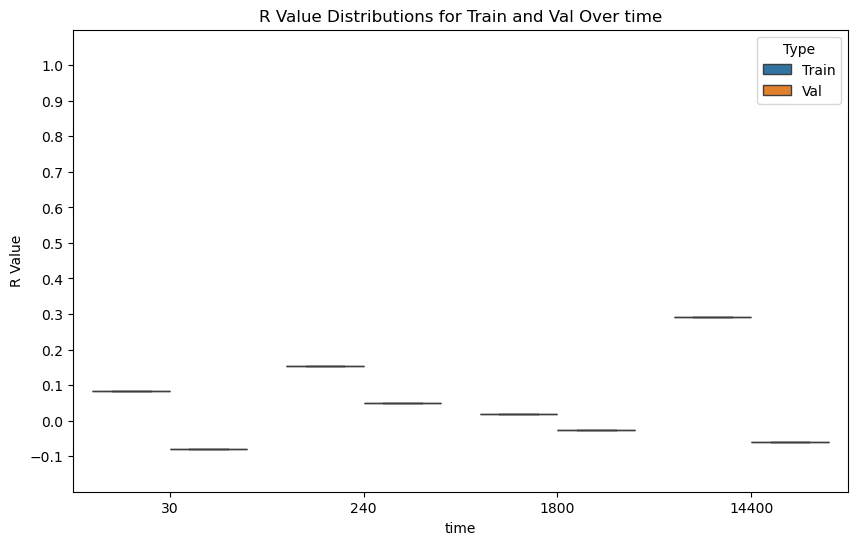

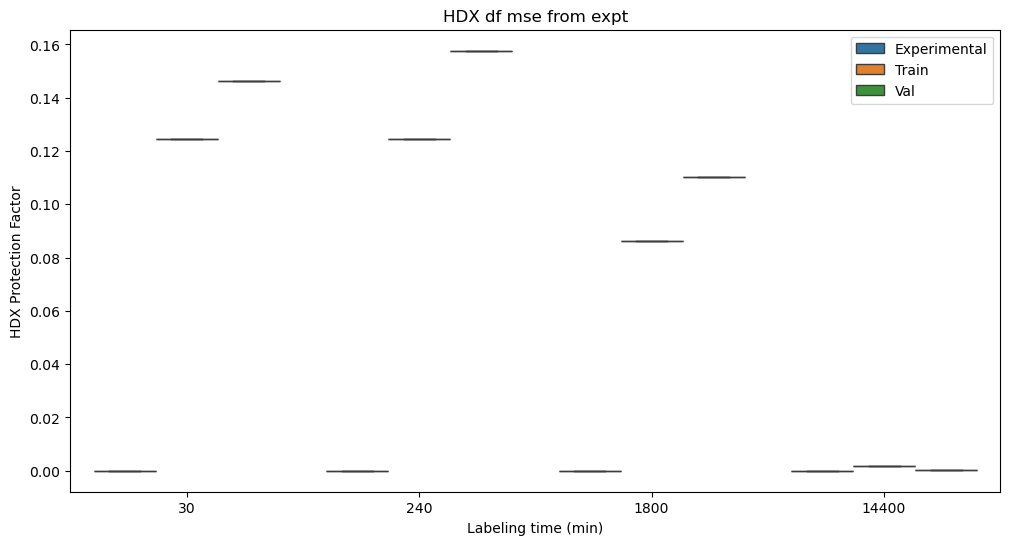

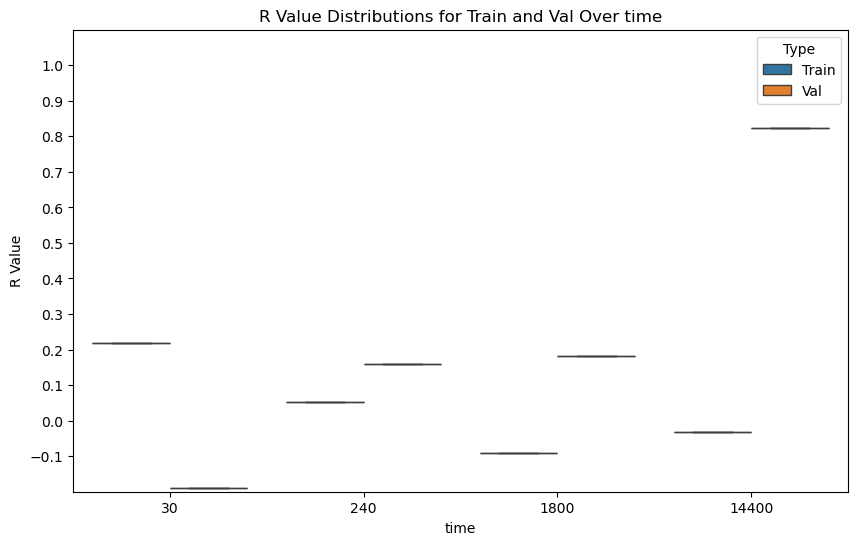

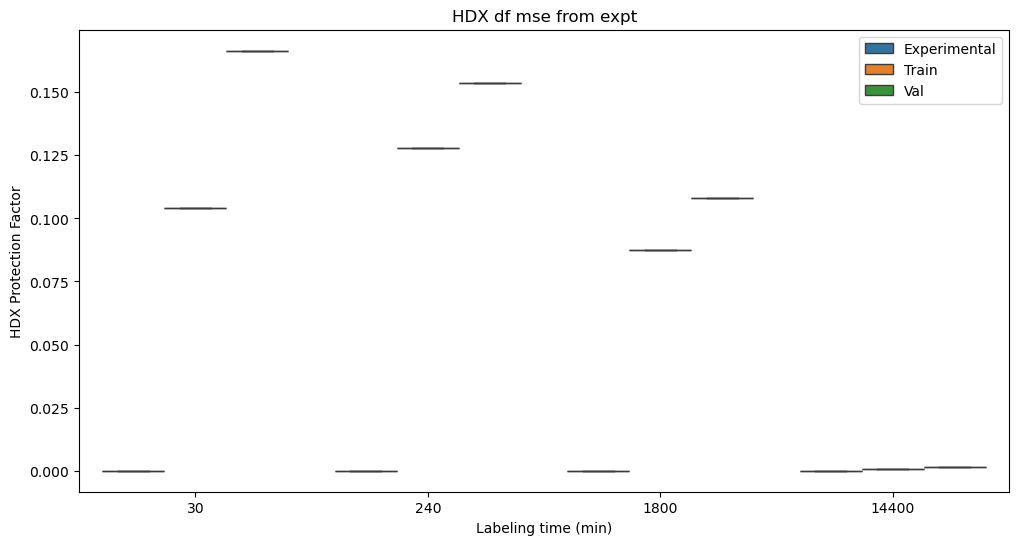

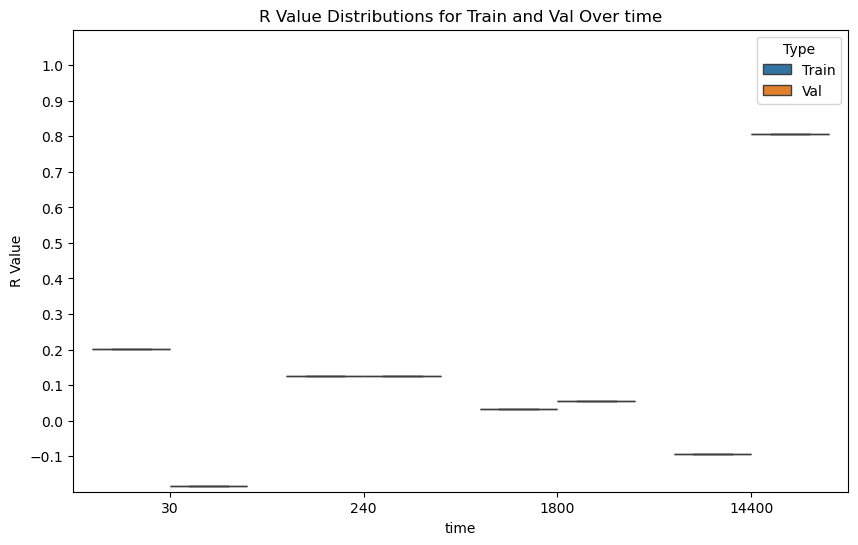

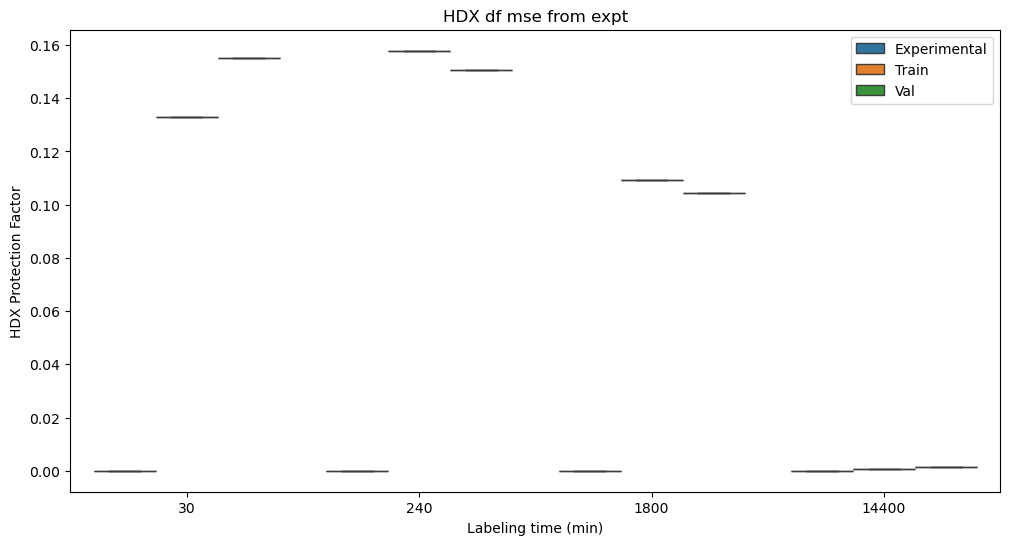

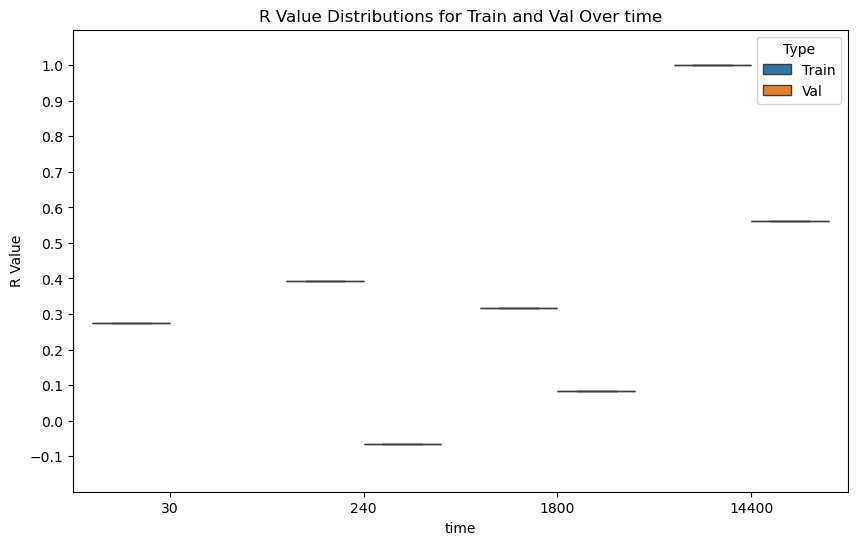

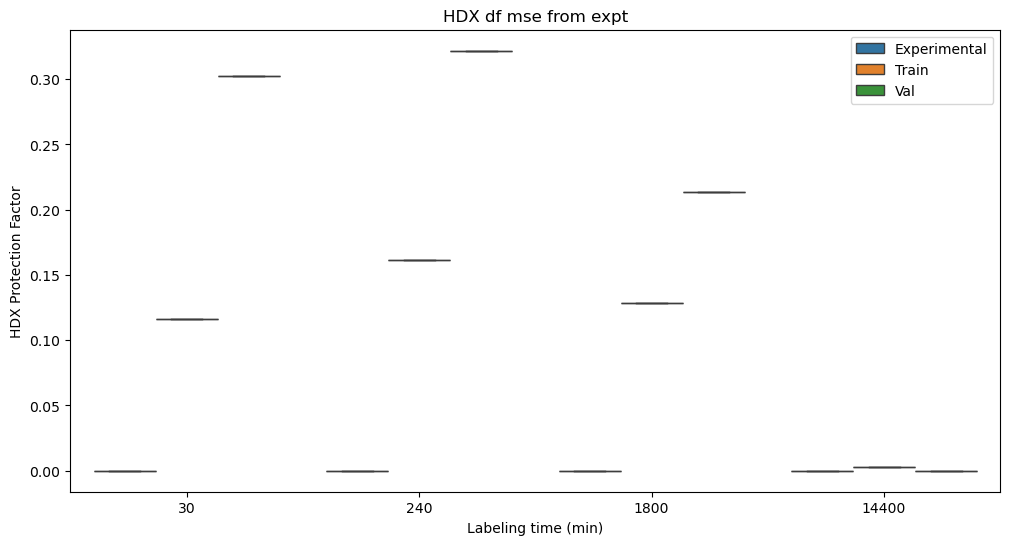

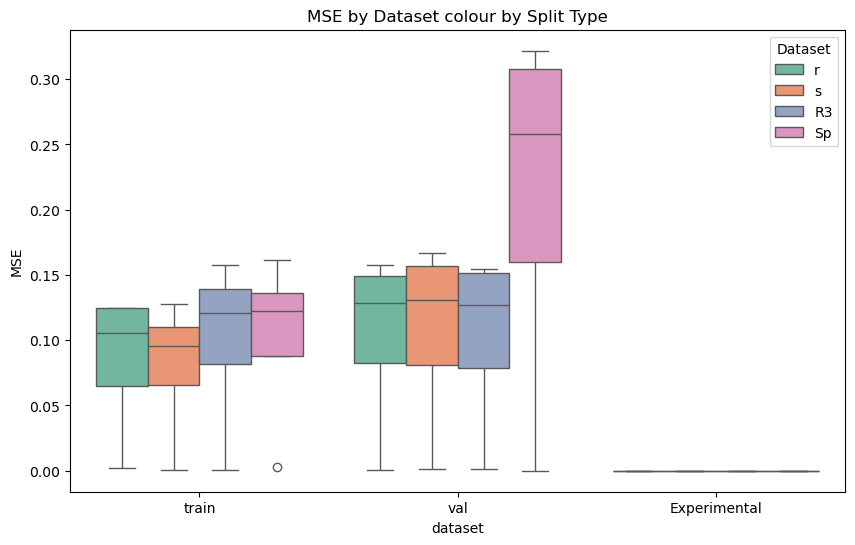

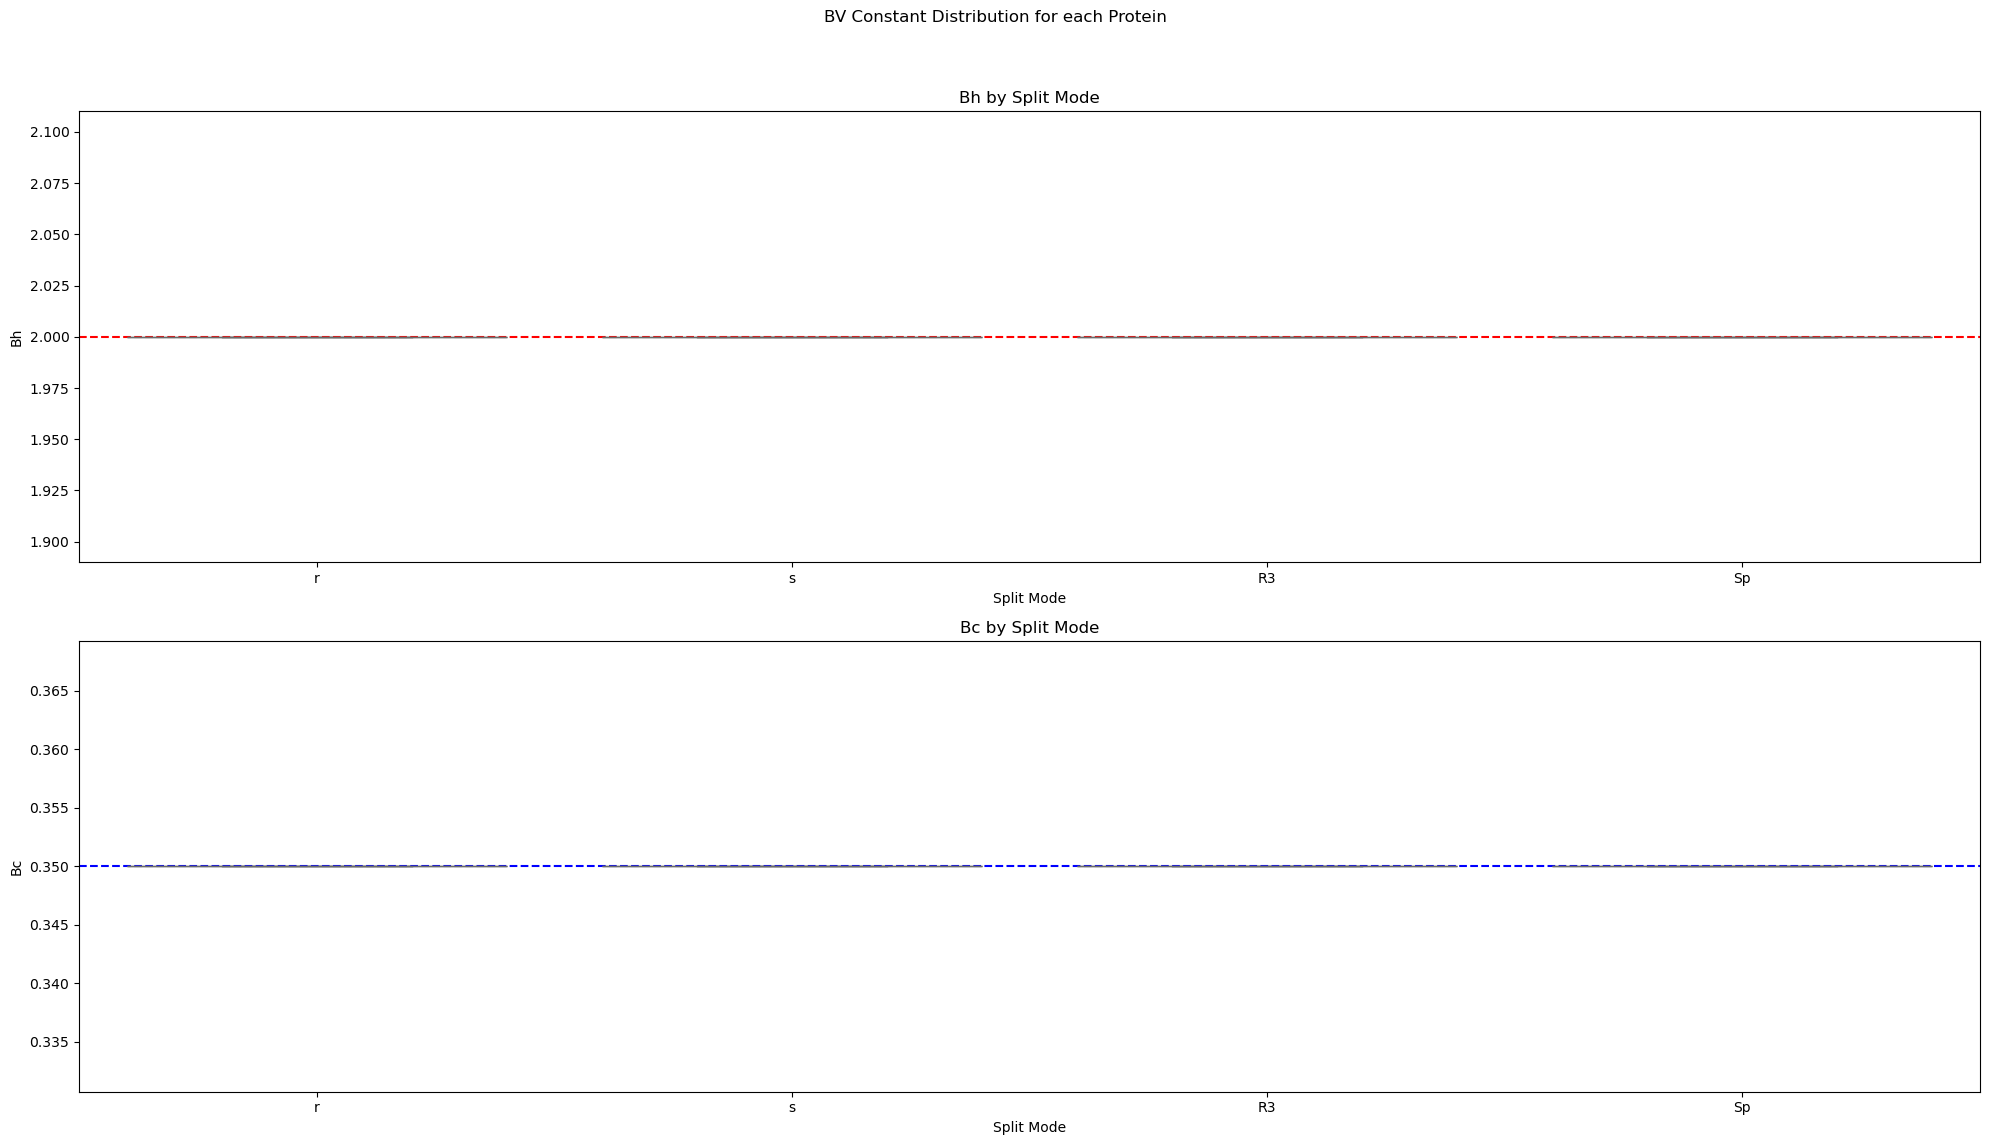

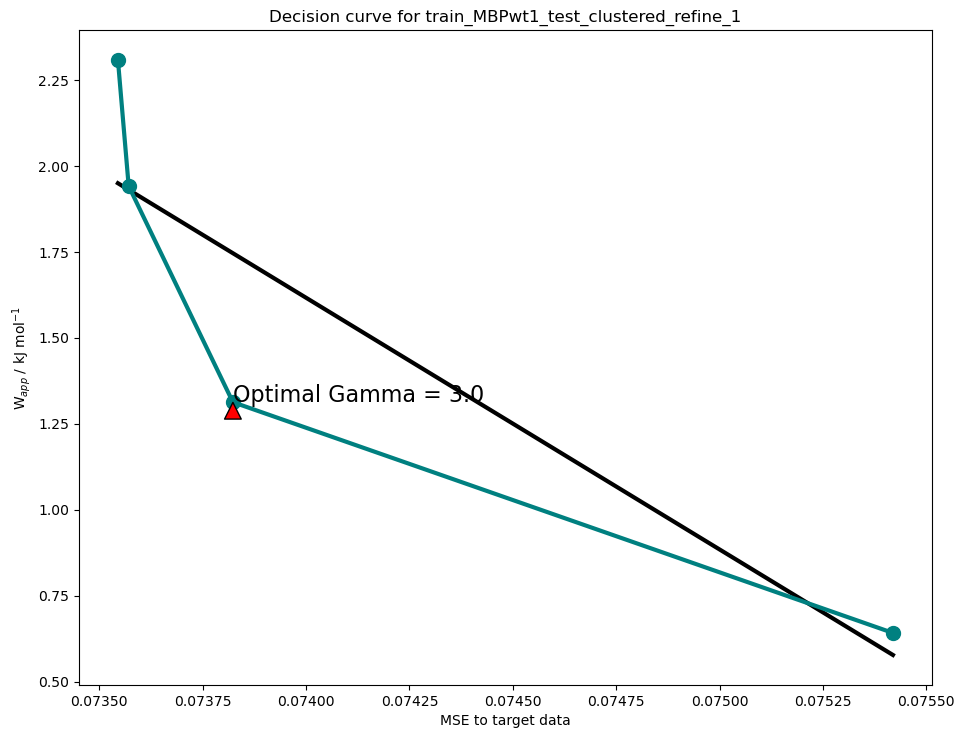

Optimal gamma for train_MBPwt1_test_clustered_refine_1 is 3.0x10^0
/home/alexi/Documents/ValDX/data/test_full0.5_MBPwt1_test_refine1/train_MBPwt1_test_clustered_refine_1/reweighting_gamma_3x10^0final_segment_fractions.dat
Path /home/alexi/Documents/ValDX/data/test_full0.5_MBPwt1_test_refine1/train_MBPwt1_test_clustered_refine_1/reweighting_gamma_3x10^0final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(44, 5)
        30      240     1800    14400  peptide
0  0.99990  1.00000  1.00000  1.00000        0
1  0.99991  1.00000  1.00000  1.00000        1
2  0.73161  0.76198  0.87321  0.92180        2
3  0.40606  0.65426  0.82442  0.91405        3
4  0.36999  0.58320  0.74264  0.86493        4
         30      240     1800    14400  peptide
0   0.99990  1.00000  1.00000  1.00000        0
1   0.99991  1.00000  1.00000  1.00000        1
2   0.73161  0.76198  0.87321  0.92180        2
3   0.40606  0.65426  0.82442  0.91405        3
4   0.36999  0.58320  0.74264  0.86493        4
5   0.34047

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_MBPwt1_test_clustered_refine_1
     ResStr  ResEnd  peptide
0        19      30        0
1        19      31        1
2        24      35        2
3        31      53        3
4        32      46        4
..      ...     ...      ...
110     357     372      110
111     362     370      111
112     362     372      112
113     362     377      113
114     370     377      114

[115 rows x 3 columns]
Residues for recalculation: [ 19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 1

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar di

Recalculating val_MBPwt1_test_clustered_refine_1
    ResStr  ResEnd  peptide                                               path
0       55      72        6  /home/alexi/Documents/ValDX/data/test_full0.5_...
1       73      80        7  /home/alexi/Documents/ValDX/data/test_full0.5_...
2       73      81        8  /home/alexi/Documents/ValDX/data/test_full0.5_...
3       73      86        9  /home/alexi/Documents/ValDX/data/test_full0.5_...
4       81      86       11  /home/alexi/Documents/ValDX/data/test_full0.5_...
5      192     205       49  /home/alexi/Documents/ValDX/data/test_full0.5_...
6      192     206       50  /home/alexi/Documents/ValDX/data/test_full0.5_...
7      204     206       51  /home/alexi/Documents/ValDX/data/test_full0.5_...
8      206     209       52  /home/alexi/Documents/ValDX/data/test_full0.5_...
9      206     221       53  /home/alexi/Documents/ValDX/data/test_full0.5_...
10     207     217       54  /home/alexi/Documents/ValDX/data/test_full0.5_...
11 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar di

LogPf_by_res shape
(166,)
[8.64791170e+00 8.28509655e+00 9.68755681e+00 7.15508347e+00
 6.94634264e+00 8.85894347e+00 8.75083347e+00 8.72408950e+00
 6.60770133e+00 1.09897352e+01 8.90560851e+00 1.27055905e+00
 2.56828979e+00 7.84040863e+00 8.12241648e+00 6.99007631e+00
 9.25868280e+00 1.24544223e+01 5.91143845e+00 1.03888031e+01
 1.54706982e+01 7.99010255e+00 5.19777624e+00 6.53882156e+00
 9.50492927e+00 1.25273952e+01 1.27220947e+01 1.37856842e+01
 1.56092667e+01 1.15250564e+01 1.26810351e+01 1.18873343e+01
 9.17058418e+00 1.53626198e+01 6.88905945e+00 7.22695782e+00
 7.76548895e-03 3.98270103e+00 7.84059521e+00 6.97788811e+00
 1.09313445e+01 3.62673902e+00 2.85059283e+00 8.73458000e+00
 9.98419980e+00 1.22550090e+01 1.09029346e+01 9.79117318e+00
 7.74103763e+00 3.54189058e+00 7.29929535e+00 1.75915087e+01
 1.42091881e+01 1.08613500e+01 1.57782341e+01 1.55499986e+01
 1.04164677e+01 1.06840620e+01 1.07222425e+01 1.08664743e+01
 1.07165133e+01 1.39678218e+01 1.29618169e+01 8.59117184e+0

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(333,)
[4.44291089e-01 4.41406537e-01 5.75276400e-01 6.79094397e-01
 7.45229040e-01 8.03355053e-01 1.97709316e+00 4.84088839e+00
 4.18161048e+00 6.97040678e+00 5.23605810e+00 3.17584095e+00
 6.23547415e+00 8.95797706e+00 1.31462104e+01 1.20684563e+01
 1.66089665e+01 1.67386240e+01 1.44042238e+01 1.17861915e+01
 6.65974961e+00 3.44873988e+00 8.42417906e+00 1.21140814e+01
 1.06988382e+01 6.84619146e+00 1.25533023e+01 1.37921205e+01
 1.07619626e+01 9.41254939e+00 9.90741854e+00 1.32484032e+01
 1.22305667e+01 9.76295433e+00 1.38681937e+01 1.44434289e+01
 8.64791170e+00 8.28509655e+00 9.68755681e+00 7.15508347e+00
 6.94634264e+00 8.85894347e+00 8.75083347e+00 8.72408950e+00
 6.60770133e+00 1.09897352e+01 8.90560851e+00 1.27055905e+00
 2.56828979e+00 7.84040863e+00 8.12241648e+00 6.99007631e+00
 9.25868280e+00 1.24544223e+01 5.91143845e+00 1.03888031e+01
 1.54706982e+01 7.99010255e+00 5.19777624e+00 6.53882156e+00
 9.50492927e+00 1.25273952e+01 1.27220947e+01 1.37856842e+0

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/universe.py:817: DeprecationWarning

Writing train PDB to results/test_full0.5_MBPwt1_test_refine/train_1_test_full0.5_MBPwt1_test_refine_R3_20240301-172911.pdb
Writing val PDB to results/test_full0.5_MBPwt1_test_refine/val_1_test_full0.5_MBPwt1_test_refine_R3_20240301-172911.pdb
Finished running VDX loop
Evaluating HDX
plotting gamma distributions
['train_MBPwt1_test_clustered_refine_1']
['val_MBPwt1_test_clustered_refine_1']
Restoring trainval peptide numbers
train_rep_names ['train_MBPwt1_test_clustered_refine_1']
val_rep_names ['val_MBPwt1_test_clustered_refine_1']
test_rep_names ['test_MBPwt1_test_clustered_refine_1']
train_rep_peptides [0, 1, 2, 3, 4, 5, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]
val_rep_peptides [6, 7, 8, 9, 11, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 10

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


plotting R agreement
concat plot_df
plotting nan_df
nan_df
nan_df + expt_df
plotting abs error for nan_df
plotting MSE for nan_df
plotting AVG df
     Bc   Bh                             calc_name
0  0.35  2.0  train_MBPwt1_test_clustered_refine_1
Coords shape
(55, 1188)
Performing PCA
Transformed data
(55, 2)
Cluster Centers
[[ 364.21558  -130.81789 ]
 [-385.7801    110.61809 ]
 [ 356.13068   268.22543 ]
 [-323.44904  -162.47807 ]
 [  32.241528  226.79968 ]]
Getting cluster labels
(55,)
Unique labels
Final Cluster Weights
[2.43613238 0.84349015 1.09296034 0.32723678 0.30018035]
5.0
5
Final Cluster Weights
[2.43613238 0.84349015 1.09296034 0.32723678 0.30018035]
(5,)


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


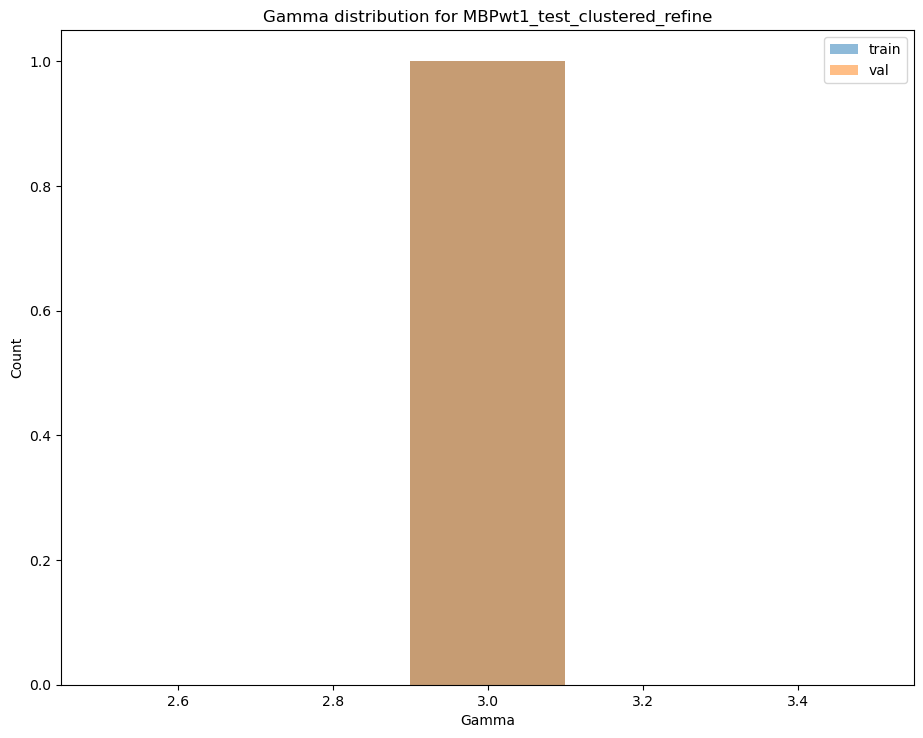

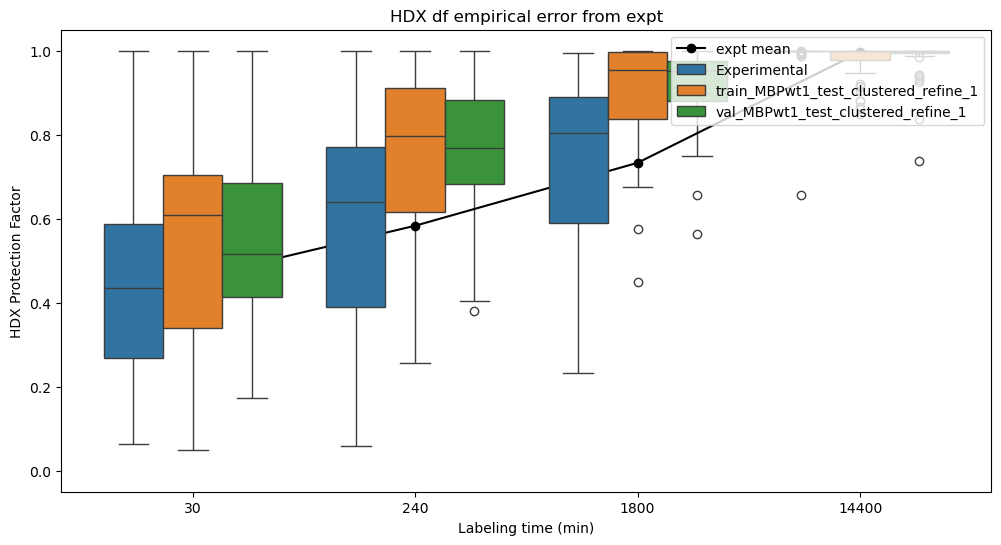

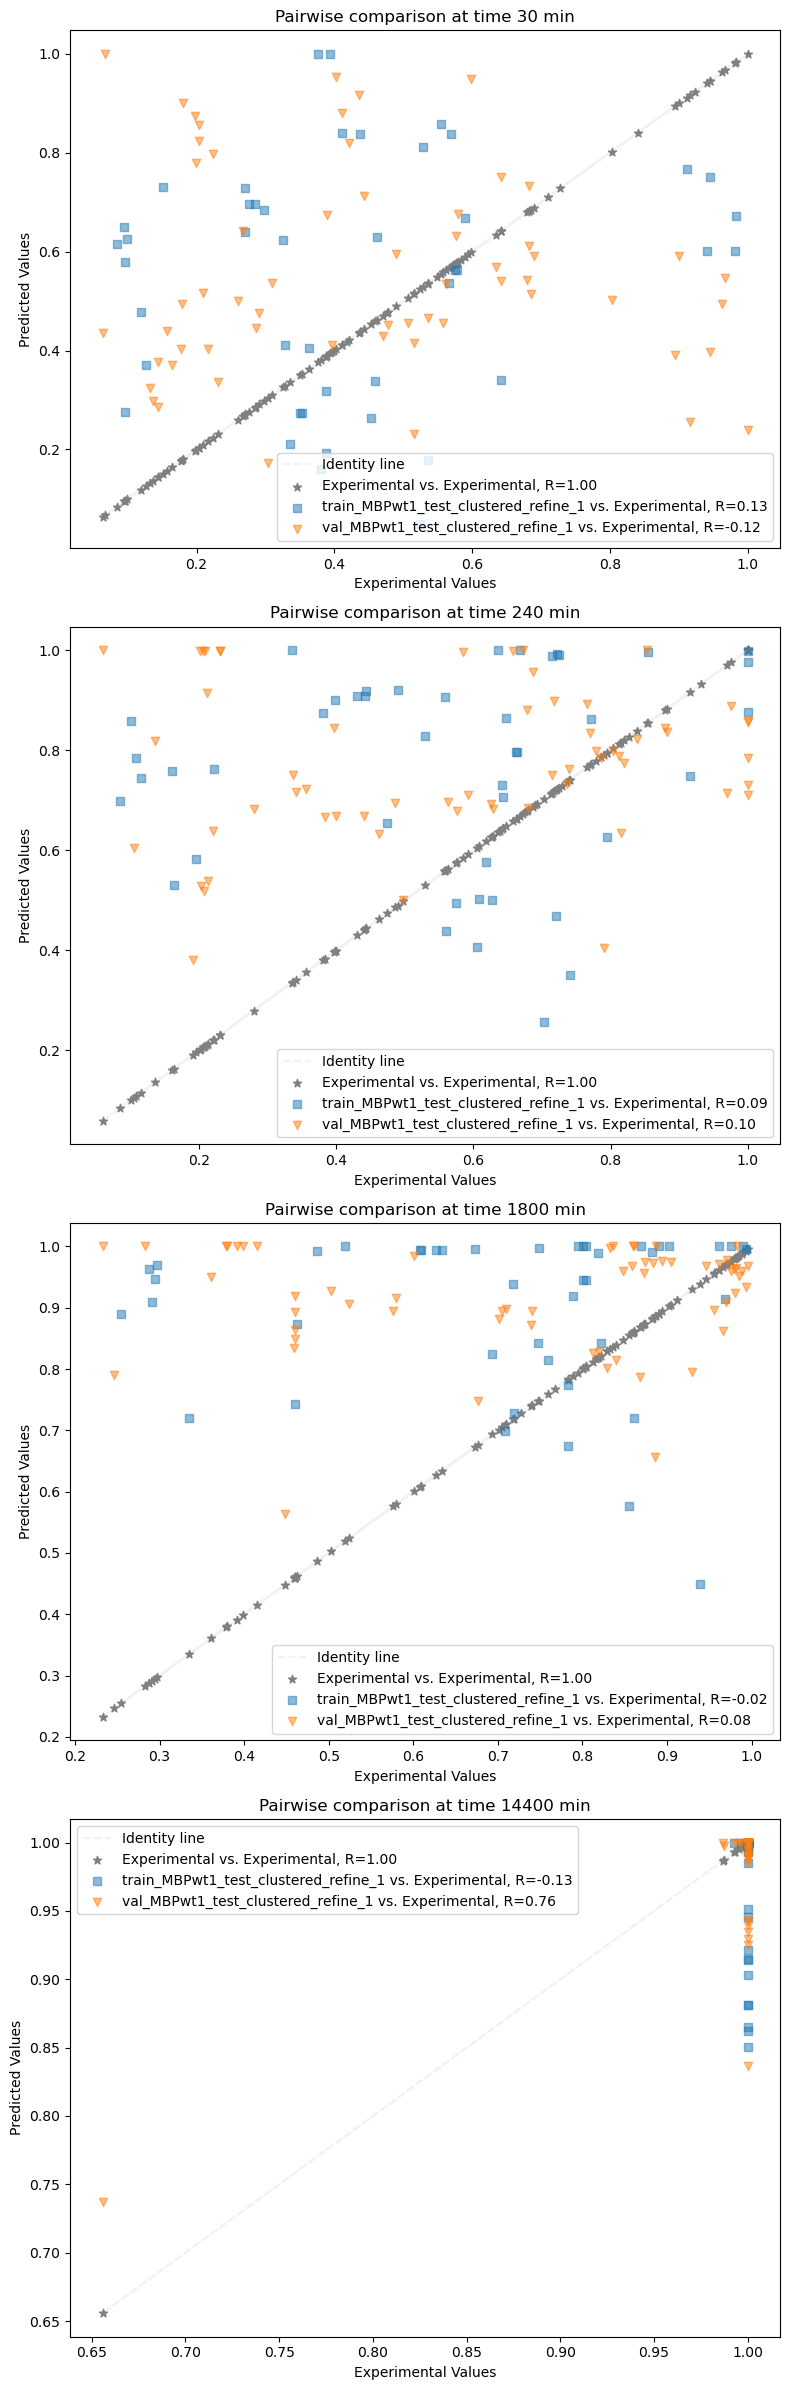

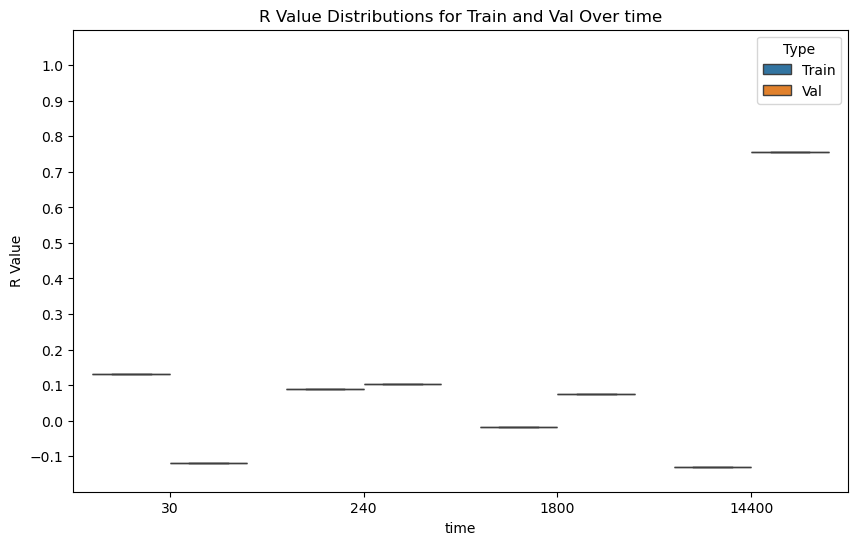

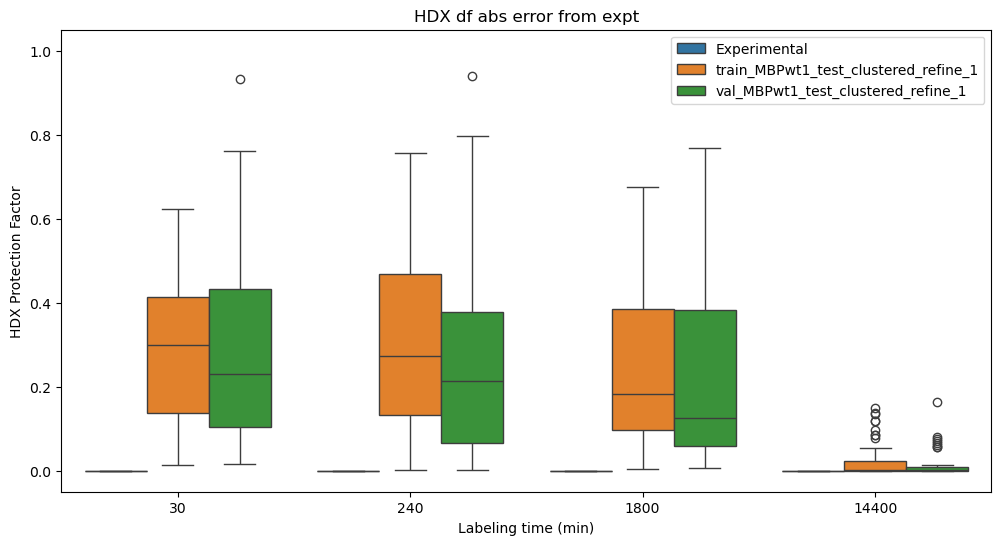

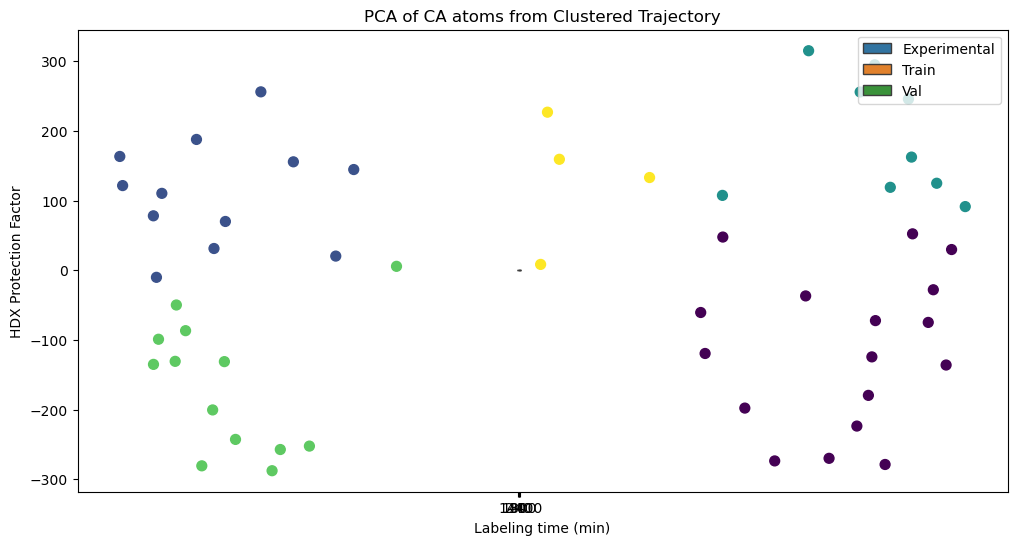

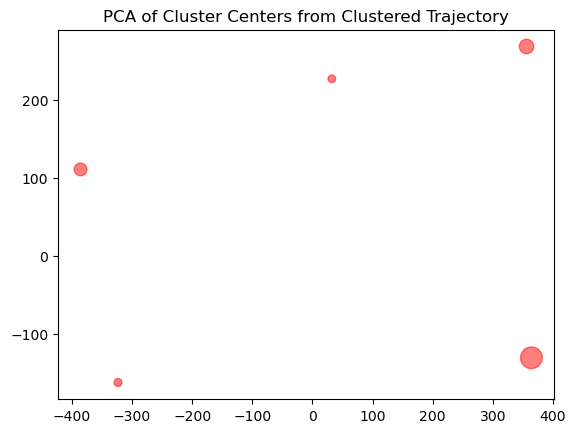

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:241: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


(2, 6)
Running benchmark for test_full0.5
Running r split mode
envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_h

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degr

/home/alexi/Documents/ValDX/data/test_full0.5_r_naive_random11/train_MBPwt1_test_reclustered_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/test_full0.5_r_naive_random11/train_MBPwt1_test_reclustered_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/test_full0.5_r_naive_random11/train_MBPwt1_test_reclustered_1/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/test_full0.5_r_naive_random11/train_MBPwt1_test_reclustered_1/reweighting_gamma_5x10^0



Contacts readContacts readContacts read


Hbonds readHbonds readHbonds read


Segments and experimental dfracs readSegments and experimental dfracs readSegments and experimental dfracs readContacts read



Hbonds read
Segments and experimental dfracs read
Sum of Output WeightsSum of Output WeightsSum of Output Weights


1.01.01.0


Sum of Output Weights
1.0
Finished reweighting
[(array([0.48722648, 0.16869803, 0.21859207, 0.06544736, 0.06003607]), 0.35, 2.0), (array([0.48722648, 0.16869803, 0.21859207, 0.06544736, 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_MBPwt1_test_reclustered_1
     ResStr  ResEnd  peptide
0        19      30        0
1        19      31        1
2        24      35        2
3        31      53        3
4        32      46        4
..      ...     ...      ...
110     357     372      110
111     362     370      111
112     362     372      112
113     362     377      113
114     370     377      114

[115 rows x 3 columns]
Residues for recalculation: [ 19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 15

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar d

Recalculating val_MBPwt1_test_reclustered_1
    ResStr  ResEnd  peptide                                               path
0       19      31        1  /home/alexi/Documents/ValDX/data/test_full0.5_...
1       24      35        2  /home/alexi/Documents/ValDX/data/test_full0.5_...
2       31      53        3  /home/alexi/Documents/ValDX/data/test_full0.5_...
3       55      72        6  /home/alexi/Documents/ValDX/data/test_full0.5_...
4       73      81        8  /home/alexi/Documents/ValDX/data/test_full0.5_...
5       82      87       13  /home/alexi/Documents/ValDX/data/test_full0.5_...
6       87     100       14  /home/alexi/Documents/ValDX/data/test_full0.5_...
7       87     107       17  /home/alexi/Documents/ValDX/data/test_full0.5_...
8       88     107       20  /home/alexi/Documents/ValDX/data/test_full0.5_...
9       96     106       21  /home/alexi/Documents/ValDX/data/test_full0.5_...
10     106     114       23  /home/alexi/Documents/ValDX/data/test_full0.5_...
11     1

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar di

LogPf_by_res shape
(296,)
[ 0.58191138  0.54693365  0.58191138  0.61730913  0.91255452  0.80106956
  1.97867114  5.91204405  5.63882358  8.93992158  6.14225804  4.10248015
  6.9        10.33015964 13.20973336 11.87650722 16.50540416 16.71512511
 14.19634745 11.62111547  6.49343584  3.00403307  8.1268368  11.91512511
 11.34523298  7.20963051 12.69343584 13.93608583 10.60850905  9.35
 10.02709343 12.7427987  11.85948816 10.00418685 13.76444847  8.65
  8.22349278  9.64095569  7.04762269  6.59639935  8.75        8.61444847
  8.93317423  6.60247918 10.87650626  9.2095391   1.60501124  2.660403
  7.99329349  7.74485881  6.94202525  8.92509663 12.10179111  5.43418277
 10.5881705  15.44762269  8.46815503  4.71495151  6.4070315  10.68120092
 14.25220161 13.01035206 13.19026664 15.59639935 12.60296351 12.78861789
  7.7358416  13.7682424   8.6644994  10.36166439 12.29173518 14.03250284
 13.33897129 10.68127424 15.75320774  8.77232037  6.64352629  6.2
  9.47232037  9.87650722 12.10797475  3.599413

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(333,)
[ 0.58191138  0.54693365  0.58191138  0.61730913  0.91255452  0.80106956
  1.97867114  5.91204405  5.63882358  8.93992158  6.14225804  4.10248015
  6.9        10.33015964 13.20973336 11.87650722 16.50540416 16.71512511
 14.19634745 11.62111547  6.49343584  3.00403307  8.1268368  11.91512511
 11.34523298  7.20963051 12.69343584 13.93608583 10.60850905  9.35
 10.02709343 12.7427987  11.85948816 10.00418685 13.76444847 14.40656416
  8.65        8.22349278  9.64095569  7.04762269  6.59639935  8.75
  8.61444847  8.93317423  6.60247918 10.87650626  9.2095391   1.60501124
  2.660403    7.99329349  7.74485881  6.94202525  8.92509663 12.10179111
  5.43418277 10.5881705  15.44762269  8.46815503  4.71495151  6.4070315
 10.68120092 14.25220161 13.01035206 13.19026664 15.59639935 12.60296351
 12.78861789  7.7358416  13.7682424   8.6644994  10.36166439 12.29173518
 14.03250284 13.33897129 10.68127424 15.75320774  8.77232037  6.64352629
  6.2         9.47232037  9.87650722 1

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


concat plot_df
plotting nan_df
nan_df
nan_df + expt_df
plotting MSE for nan_df
Finished evaluating HDX
     Bc   Bh                        calc_name
0  0.35  2.0  train_MBPwt1_test_reclustered_1
Analysis dumped to results/MBPwt1_test_reclustered/Benchmark/test_full0.5_r_naive_random/20240301-172948_analysis.csv
dict_keys(['test_full0.5_r_naive_random'])
dict_keys(['train_dfs', 'val_dfs', 'test_dfs', 'expt_df', 'merge_df', 'expt_segs', 'train_segs', 'val_segs', 'n_reps', 'times', 'expt_name', 'calc_name', 'train_rep_names', 'val_rep_names', 'HDX_data', 'train_gammas', 'val_gammas', 'weights', 'BV_constants', 'LogPfs'])
Key: train_dfs
<class 'list'>
Key: val_dfs
<class 'list'>
Key: test_dfs
<class 'list'>
Key: expt_df
<class 'pandas.core.frame.DataFrame'>
Adding test_full0.5_r_naive_random to df expt_df
Key: merge_df
<class 'pandas.core.frame.DataFrame'>
Adding test_full0.5_r_naive_random to df merge_df
Key: expt_segs
<class 'pandas.core.frame.DataFrame'>
Adding test_full0.5_r_naive_rand

/home/alexi/Documents/ValDX/ValDX/ValidationDX.py:1408: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dump["name"] = [name]*len(dump)
/home/alexi/Documents/ValDX/ValDX/ValidationDX.py:1409: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dump["split_type"] = [self.settings.split_mode]*len(dump)
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:931: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
Experiment name test_full0.5_s_naive_sequential already e

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degr

/home/alexi/Documents/ValDX/data/test_full0.5_s_naive_sequential5/train_MBPwt1_test_reclustered_1/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/test_full0.5_s_naive_sequential5/train_MBPwt1_test_reclustered_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/test_full0.5_s_naive_sequential5/train_MBPwt1_test_reclustered_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/test_full0.5_s_naive_sequential5/train_MBPwt1_test_reclustered_1/reweighting_gamma_5x10^0



Contacts readContacts read

Hbonds read
Hbonds read
Contacts read
Hbonds read
Segments and experimental dfracs read
Segments and experimental dfracs read
Segments and experimental dfracs read
Contacts readSum of Output Weights

Hbonds read1.0

Sum of Output Weights
1.0
Segments and experimental dfracs readSum of Output Weights

1.0
Sum of Output Weights
1.0
Finished reweighting
[(array([0.48722648, 0.16869803, 0.21859207, 0.06544736, 0.06003607]), 0.35, 2.0), (array([0.48722648, 0.16869803, 0.21859207, 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_MBPwt1_test_reclustered_1
     ResStr  ResEnd  peptide
0        19      30        0
1        19      31        1
2        24      35        2
3        31      53        3
4        32      46        4
..      ...     ...      ...
110     357     372      110
111     362     370      111
112     362     372      112
113     362     377      113
114     370     377      114

[115 rows x 3 columns]
Residues for recalculation: [ 19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 15

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar di

Recalculating val_MBPwt1_test_reclustered_1
    ResStr  ResEnd  peptide                                               path
0      221     225       58  /home/alexi/Documents/ValDX/data/test_full0.5_...
1      222     227       59  /home/alexi/Documents/ValDX/data/test_full0.5_...
2      225     235       60  /home/alexi/Documents/ValDX/data/test_full0.5_...
3      226     234       61  /home/alexi/Documents/ValDX/data/test_full0.5_...
4      226     235       62  /home/alexi/Documents/ValDX/data/test_full0.5_...
5      228     234       63  /home/alexi/Documents/ValDX/data/test_full0.5_...
6      228     235       64  /home/alexi/Documents/ValDX/data/test_full0.5_...
7      229     235       65  /home/alexi/Documents/ValDX/data/test_full0.5_...
8      236     245       66  /home/alexi/Documents/ValDX/data/test_full0.5_...
9      246     253       67  /home/alexi/Documents/ValDX/data/test_full0.5_...
10     248     256       68  /home/alexi/Documents/ValDX/data/test_full0.5_...
11     2

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar di

LogPf_by_res shape
(148,)
[10.63496533 10.73059123 10.69095569 14.14819649 12.93116405  8.65
  6.87709343  6.58613774 10.68317423  8.7138683   8.1054946   4.51386226
  2.45539176 10.80904431 11.9         7.09518205  4.2439192   7.6
 14.52349278 12.78506818  9.72101262 13.65296351 13.8898747   9.97349278
  8.04751985  9.50306635 10.82650722 12.86464483 16.35189395 14.52115497
 18.47101262 11.8005862  11.77709343  9.2872522   3.13908212  9.06726963
  9.64676352  6.28238867  4.99911767  9.81839001 10.50130775  5.71299253
  8.03544869  4.31251097  5.35749139  5.63847554  7.7        11.47290657
 10.86512511 12.70237731  8.18794124 10.41861688 13.95096672 14.6439192
  6.72407898  3.96264496  7.95       12.34751381 13.8598687  13.51395875
 15.16658664 13.93607979 12.26861688 14.2742662  17.60237731 18.90180351
 18.0445054  13.55248015 14.25588751 11.97052927  6.48848794 11.1439192
  7.47042642  5.77592102  3.92650722  6.52338993 11.82290657 12.95296351
 11.8        13.90189395 12.15189395 14.

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(333,)
[ 0.58191138  0.54693365  0.58191138  0.61730913  0.91255452  0.80106956
  1.97867114  5.91204405  5.63882358  8.93992158  6.14225804  4.10248015
  6.9        10.33015964 13.20973336 11.87650722 16.50540416 16.71512511
 14.19634745 11.62111547  6.49343584  3.00403307  8.1268368  11.91512511
 11.34523298  7.20963051 12.69343584 13.93608583 10.60850905  9.35
 10.02709343 12.7427987  11.85948816 10.00418685 13.76444847 14.40656416
  8.65        8.22349278  9.64095569  7.04762269  6.59639935  8.75
  8.61444847  8.93317423  6.60247918 10.87650626  9.2095391   1.60501124
  2.660403    7.99329349  7.74485881  6.94202525  8.92509663 12.10179111
  5.43418277 10.5881705  15.44762269  8.46815503  4.71495151  6.4070315
 10.68120092 14.25220161 13.01035206 13.19026664 15.59639935 12.60296351
 12.78861789  7.7358416  13.7682424   8.6644994  10.36166439 12.29173518
 14.03250284 13.33897129 10.68127424 15.75320774  8.77232037  6.64352629
  6.2         9.47232037  9.87650722 1

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


concat plot_df
plotting nan_df
nan_df
nan_df + expt_df
plotting MSE for nan_df
Finished evaluating HDX
     Bc   Bh                        calc_name
0  0.35  2.0  train_MBPwt1_test_reclustered_1
Analysis dumped to results/MBPwt1_test_reclustered/Benchmark/test_full0.5_s_naive_sequential/20240301-173023_analysis.csv
dict_keys(['test_full0.5_s_naive_sequential'])
dict_keys(['train_dfs', 'val_dfs', 'test_dfs', 'expt_df', 'merge_df', 'expt_segs', 'train_segs', 'val_segs', 'n_reps', 'times', 'expt_name', 'calc_name', 'train_rep_names', 'val_rep_names', 'HDX_data', 'train_gammas', 'val_gammas', 'weights', 'BV_constants', 'LogPfs'])
Key: train_dfs
<class 'list'>
Key: val_dfs
<class 'list'>
Key: test_dfs
<class 'list'>
Key: expt_df
<class 'pandas.core.frame.DataFrame'>
Adding test_full0.5_s_naive_sequential to df expt_df
Key: merge_df
<class 'pandas.core.frame.DataFrame'>
Adding test_full0.5_s_naive_sequential to df merge_df
Key: expt_segs
<class 'pandas.core.frame.DataFrame'>
Adding test_full

/home/alexi/Documents/ValDX/ValDX/ValidationDX.py:1408: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dump["name"] = [name]*len(dump)
/home/alexi/Documents/ValDX/ValDX/ValidationDX.py:1409: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dump["split_type"] = [self.settings.split_mode]*len(dump)
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:931: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
Experiment name test_full0.5_R3_k_sequence already exists

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degr

/home/alexi/Documents/ValDX/data/test_full0.5_R3_k_sequence6/train_MBPwt1_test_reclustered_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/test_full0.5_R3_k_sequence6/train_MBPwt1_test_reclustered_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/test_full0.5_R3_k_sequence6/train_MBPwt1_test_reclustered_1/reweighting_gamma_5x10^0/home/alexi/Documents/ValDX/data/test_full0.5_R3_k_sequence6/train_MBPwt1_test_reclustered_1/reweighting_gamma_4x10^0



Contacts readContacts readContacts readContacts read



Hbonds readHbonds readHbonds read

Hbonds read

Segments and experimental dfracs readSegments and experimental dfracs readSegments and experimental dfracs read


Segments and experimental dfracs read
Sum of Output WeightsSum of Output WeightsSum of Output WeightsSum of Output Weights



1.01.01.0

1.0

Finished reweighting
[(array([0.48722648, 0.16869803, 0.21859207, 0.06544736, 0.06003607]), 0.35, 2.0), (array([0.48722648, 0.16869803, 0.21859207, 0.06544736, 0.060036

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_MBPwt1_test_reclustered_1
     ResStr  ResEnd  peptide
0        19      30        0
1        19      31        1
2        24      35        2
3        31      53        3
4        32      46        4
..      ...     ...      ...
110     357     372      110
111     362     370      111
112     362     372      112
113     362     377      113
114     370     377      114

[115 rows x 3 columns]
Residues for recalculation: [ 19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 15

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar di

Recalculating val_MBPwt1_test_reclustered_1
    ResStr  ResEnd  peptide                                               path
0       55      72        6  /home/alexi/Documents/ValDX/data/test_full0.5_...
1       73      80        7  /home/alexi/Documents/ValDX/data/test_full0.5_...
2       73      81        8  /home/alexi/Documents/ValDX/data/test_full0.5_...
3       73      86        9  /home/alexi/Documents/ValDX/data/test_full0.5_...
4       81      86       11  /home/alexi/Documents/ValDX/data/test_full0.5_...
5      192     205       49  /home/alexi/Documents/ValDX/data/test_full0.5_...
6      192     206       50  /home/alexi/Documents/ValDX/data/test_full0.5_...
7      204     206       51  /home/alexi/Documents/ValDX/data/test_full0.5_...
8      206     209       52  /home/alexi/Documents/ValDX/data/test_full0.5_...
9      206     221       53  /home/alexi/Documents/ValDX/data/test_full0.5_...
10     207     217       54  /home/alexi/Documents/ValDX/data/test_full0.5_...
11     2

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(166,)
[ 8.65        8.22349278  9.64095569  7.04762269  6.59639935  8.75
  8.61444847  8.93317423  6.60247918 10.87650626  9.2095391   1.60501124
  2.660403    7.99329349  7.74485881  6.94202525  8.92509663 12.10179111
  5.43418277 10.5881705  15.44762269  8.46815503  4.71495151  6.4070315
 10.68120092 14.25220161 13.01035206 13.19026664 15.59639935 11.22645629
 11.62045616 13.24114884  8.53316183 15.62709343  6.74518205  6.79984622
  0.          4.02713293  7.79814556  6.77042642 10.77879409  3.27820789
  3.15        8.87791782 10.09095569 12.52645629 10.64498876  9.77898738
  7.72101262  3.27042642  7.26804911 17.00368506 14.22543766 11.28565438
 16.01940877 15.30189395 10.7060808  10.61444847 10.63496533 10.73059123
 10.69095569 14.14819649 12.93116405  8.65        6.87709343  6.58613774
 10.68317423  8.7138683   8.1054946   4.51386226  2.45539176 10.80904431
 11.9         7.09518205  4.2439192   7.6        14.52349278 12.78506818
  9.72101262 13.65296351 13.8898

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar di

LogPf_by_res shape
(333,)
[ 0.58191138  0.54693365  0.58191138  0.61730913  0.91255452  0.80106956
  1.97867114  5.91204405  5.63882358  8.93992158  6.14225804  4.10248015
  6.9        10.33015964 13.20973336 11.87650722 16.50540416 16.71512511
 14.19634745 11.62111547  6.49343584  3.00403307  8.1268368  11.91512511
 11.34523298  7.20963051 12.69343584 13.93608583 10.60850905  9.35
 10.02709343 12.7427987  11.85948816 10.00418685 13.76444847 14.40656416
  8.65        8.22349278  9.64095569  7.04762269  6.59639935  8.75
  8.61444847  8.93317423  6.60247918 10.87650626  9.2095391   1.60501124
  2.660403    7.99329349  7.74485881  6.94202525  8.92509663 12.10179111
  5.43418277 10.5881705  15.44762269  8.46815503  4.71495151  6.4070315
 10.68120092 14.25220161 13.01035206 13.19026664 15.59639935 12.60296351
 12.78861789  7.7358416  13.7682424   8.6644994  10.36166439 12.29173518
 14.03250284 13.33897129 10.68127424 15.75320774  8.77232037  6.64352629
  6.2         9.47232037  9.87650722 1

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


concat plot_df
plotting nan_df
nan_df
nan_df + expt_df
plotting MSE for nan_df
Finished evaluating HDX
     Bc   Bh                        calc_name
0  0.35  2.0  train_MBPwt1_test_reclustered_1
Analysis dumped to results/MBPwt1_test_reclustered/Benchmark/test_full0.5_R3_k_sequence/20240301-173053_analysis.csv
dict_keys(['test_full0.5_R3_k_sequence'])
dict_keys(['train_dfs', 'val_dfs', 'test_dfs', 'expt_df', 'merge_df', 'expt_segs', 'train_segs', 'val_segs', 'n_reps', 'times', 'expt_name', 'calc_name', 'train_rep_names', 'val_rep_names', 'HDX_data', 'train_gammas', 'val_gammas', 'weights', 'BV_constants', 'LogPfs'])
Key: train_dfs
<class 'list'>
Key: val_dfs
<class 'list'>
Key: test_dfs
<class 'list'>
Key: expt_df
<class 'pandas.core.frame.DataFrame'>
Adding test_full0.5_R3_k_sequence to df expt_df
Key: merge_df
<class 'pandas.core.frame.DataFrame'>
Adding test_full0.5_R3_k_sequence to df merge_df
Key: expt_segs
<class 'pandas.core.frame.DataFrame'>
Adding test_full0.5_R3_k_sequence to

/home/alexi/Documents/ValDX/ValDX/ValidationDX.py:1408: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dump["name"] = [name]*len(dump)
/home/alexi/Documents/ValDX/ValDX/ValidationDX.py:1409: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dump["split_type"] = [self.settings.split_mode]*len(dump)
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:931: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
Experiment name test_full0.5_Sp_res_neighbours already ex

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degr

/home/alexi/Documents/ValDX/data/test_full0.5_Sp_res_neighbours5/train_MBPwt1_test_reclustered_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/test_full0.5_Sp_res_neighbours5/train_MBPwt1_test_reclustered_1/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/test_full0.5_Sp_res_neighbours5/train_MBPwt1_test_reclustered_1/reweighting_gamma_5x10^0/home/alexi/Documents/ValDX/data/test_full0.5_Sp_res_neighbours5/train_MBPwt1_test_reclustered_1/reweighting_gamma_2x10^0



Contacts readContacts readContacts readContacts read



Hbonds readHbonds readHbonds read
Hbonds read


Segments and experimental dfracs readSegments and experimental dfracs readSegments and experimental dfracs readSegments and experimental dfracs read



Sum of Output WeightsSum of Output WeightsSum of Output Weights


1.0Sum of Output Weights1.01.0



1.0
Finished reweighting
[(array([0.48722648, 0.16869803, 0.21859207, 0.06544736, 0.06003607]), 0.35, 2.0), (array([0.48722648, 0.16869803, 0.21859207, 0.06

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_MBPwt1_test_reclustered_1
     ResStr  ResEnd  peptide
0        19      30        0
1        19      31        1
2        24      35        2
3        31      53        3
4        32      46        4
..      ...     ...      ...
110     357     372      110
111     362     370      111
112     362     372      112
113     362     377      113
114     370     377      114

[115 rows x 3 columns]
Residues for recalculation: [ 19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 15

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar d

Recalculating val_MBPwt1_test_reclustered_1
    ResStr  ResEnd  peptide                                               path
0       19      30        0  /home/alexi/Documents/ValDX/data/test_full0.5_...
1       19      31        1  /home/alexi/Documents/ValDX/data/test_full0.5_...
2       47      54        5  /home/alexi/Documents/ValDX/data/test_full0.5_...
3      147     158       36  /home/alexi/Documents/ValDX/data/test_full0.5_...
4      147     159       37  /home/alexi/Documents/ValDX/data/test_full0.5_...
5      147     160       38  /home/alexi/Documents/ValDX/data/test_full0.5_...
6      162     168       39  /home/alexi/Documents/ValDX/data/test_full0.5_...
7      163     168       40  /home/alexi/Documents/ValDX/data/test_full0.5_...
8      174     179       42  /home/alexi/Documents/ValDX/data/test_full0.5_...
9      221     225       58  /home/alexi/Documents/ValDX/data/test_full0.5_...
10     222     227       59  /home/alexi/Documents/ValDX/data/test_full0.5_...
11     2

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar di

LogPf_by_res shape
(92,)
[ 0.58191138  0.54693365  0.58191138  0.61730913  0.91255452  0.80106956
  1.97867114  5.91204405  5.63882358  8.93992158  6.14225804  4.10248015
  6.9        10.60850905  9.35       10.02709343 12.7427987  11.85948816
 10.00418685 13.76444847 14.40656416  6.10096685  9.57957358  1.93491439
  5.97042642 10.11682577 13.04343584  5.60943722  6.55        9.27888453
  6.62827726 12.27042642 11.03317423  7.95       13.09090475 12.67597293
  5.30904431  5.15       12.34698555  9.99343584 11.91701906 10.13500484
  6.97709343  9.54236628 10.63496533 10.73059123 10.69095569 14.14819649
 12.93116405  8.65        6.87709343  6.58613774 10.68317423  8.7138683
  8.1054946   4.51386226  2.45539176 10.80904431 11.9         7.09518205
  4.2439192   7.6        14.52349278 12.78506818  9.72101262 13.65296351
 13.8898747   9.97349278  8.04751985  6.28238867  4.99911767  9.81839001
 10.50130775  5.71299253  8.03544869  4.31251097  5.35749139  5.63847554
  7.7        11.47290657 10

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar di

LogPf_by_res shape
(333,)
[ 0.58191138  0.54693365  0.58191138  0.61730913  0.91255452  0.80106956
  1.97867114  5.91204405  5.63882358  8.93992158  6.14225804  4.10248015
  6.9        10.33015964 13.20973336 11.87650722 16.50540416 16.71512511
 14.19634745 11.62111547  6.49343584  3.00403307  8.1268368  11.91512511
 11.34523298  7.20963051 12.69343584 13.93608583 10.60850905  9.35
 10.02709343 12.7427987  11.85948816 10.00418685 13.76444847 14.40656416
  8.65        8.22349278  9.64095569  7.04762269  6.59639935  8.75
  8.61444847  8.93317423  6.60247918 10.87650626  9.2095391   1.60501124
  2.660403    7.99329349  7.74485881  6.94202525  8.92509663 12.10179111
  5.43418277 10.5881705  15.44762269  8.46815503  4.71495151  6.4070315
 10.68120092 14.25220161 13.01035206 13.19026664 15.59639935 12.60296351
 12.78861789  7.7358416  13.7682424   8.6644994  10.36166439 12.29173518
 14.03250284 13.33897129 10.68127424 15.75320774  8.77232037  6.64352629
  6.2         9.47232037  9.87650722 1

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


concat plot_df
plotting nan_df
nan_df
nan_df + expt_df
plotting MSE for nan_df
Finished evaluating HDX
     Bc   Bh                        calc_name
0  0.35  2.0  train_MBPwt1_test_reclustered_1
Analysis dumped to results/MBPwt1_test_reclustered/Benchmark/test_full0.5_Sp_res_neighbours/20240301-173118_analysis.csv
dict_keys(['test_full0.5_Sp_res_neighbours'])
dict_keys(['train_dfs', 'val_dfs', 'test_dfs', 'expt_df', 'merge_df', 'expt_segs', 'train_segs', 'val_segs', 'n_reps', 'times', 'expt_name', 'calc_name', 'train_rep_names', 'val_rep_names', 'HDX_data', 'train_gammas', 'val_gammas', 'weights', 'BV_constants', 'LogPfs'])
Key: train_dfs
<class 'list'>
Key: val_dfs
<class 'list'>
Key: test_dfs
<class 'list'>
Key: expt_df
<class 'pandas.core.frame.DataFrame'>
Adding test_full0.5_Sp_res_neighbours to df expt_df
Key: merge_df
<class 'pandas.core.frame.DataFrame'>
Adding test_full0.5_Sp_res_neighbours to df merge_df
Key: expt_segs
<class 'pandas.core.frame.DataFrame'>
Adding test_full0.5_

/home/alexi/Documents/ValDX/ValDX/ValidationDX.py:1408: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dump["name"] = [name]*len(dump)
/home/alexi/Documents/ValDX/ValDX/ValidationDX.py:1409: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dump["split_type"] = [self.settings.split_mode]*len(dump)
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:931: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


{'test_full0.5_r_naive_random': {'train_dfs': [         30      240     1800    14400  peptide  \
0   0.92973  0.99999  1.00000  1.00000       81   
1   0.36664  0.56782  0.74415  0.87090        4   
2   0.61582  0.70486  0.91312  0.99982       40   
3   0.46232  0.70177  0.83555  0.89664       69   
4   0.43289  0.56754  0.76495  0.93284       10   
5   0.49947  0.74412  0.81006  0.86703       45   
6   0.85587  0.99965  1.00000  1.00000       70   
7   0.55028  0.66878  0.90143  0.99943       66   
8   0.66394  0.83484  0.89918  0.96356       47   
9   0.02062  0.14102  0.49445  0.81737       11   
10  0.55247  0.81640  0.97901  1.00000      100   
11  0.69894  0.90960  0.99404  1.00000       36   
12  0.43008  0.66627  0.91060  0.99969       84   
13  0.34992  0.75815  0.93618  0.99961      113   
14  0.51704  0.72714  0.91770  0.99563       18   
15  0.97324  0.99999  1.00000  1.00000        0   
16  0.77648  0.99920  1.00000  1.00000       72   
17  0.72553  0.86239  0.98801  1.00

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degr

/home/alexi/Documents/ValDX/data/test_full0.5_r_naive_random12/train_MBPwt1_test_reclustered-BVoptimised_1/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/test_full0.5_r_naive_random12/train_MBPwt1_test_reclustered-BVoptimised_1/reweighting_gamma_5x10^0/home/alexi/Documents/ValDX/data/test_full0.5_r_naive_random12/train_MBPwt1_test_reclustered-BVoptimised_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/test_full0.5_r_naive_random12/train_MBPwt1_test_reclustered-BVoptimised_1/reweighting_gamma_2x10^0



Contacts readContacts readContacts readContacts read



Hbonds readHbonds readHbonds readHbonds read



Segments and experimental dfracs readSegments and experimental dfracs readSegments and experimental dfracs readSegments and experimental dfracs read



Sum of Output Weights
1.0
Sum of Output Weights
1.0
Sum of Output Weights
1.0
Sum of Output Weights
1.0
Finished reweighting
[(array([0.48722648, 0.16869803, 0.21859207, 0.06544736, 0.06003607]), 0.1794259336548582, 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_MBPwt1_test_reclustered-BVoptimised_1
     ResStr  ResEnd  peptide
0        19      30        0
1        19      31        1
2        24      35        2
3        31      53        3
4        32      46        4
..      ...     ...      ...
110     357     372      110
111     362     370      111
112     362     372      112
113     362     377      113
114     370     377      114

[115 rows x 3 columns]
Residues for recalculation: [ 19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 15

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar di

Recalculating val_MBPwt1_test_reclustered-BVoptimised_1
    ResStr  ResEnd  peptide                                               path
0       19      31        1  /home/alexi/Documents/ValDX/data/test_full0.5_...
1       24      35        2  /home/alexi/Documents/ValDX/data/test_full0.5_...
2       31      53        3  /home/alexi/Documents/ValDX/data/test_full0.5_...
3       55      72        6  /home/alexi/Documents/ValDX/data/test_full0.5_...
4       73      81        8  /home/alexi/Documents/ValDX/data/test_full0.5_...
5       82      87       13  /home/alexi/Documents/ValDX/data/test_full0.5_...
6       87     100       14  /home/alexi/Documents/ValDX/data/test_full0.5_...
7       87     107       17  /home/alexi/Documents/ValDX/data/test_full0.5_...
8       88     107       20  /home/alexi/Documents/ValDX/data/test_full0.5_...
9       96     106       21  /home/alexi/Documents/ValDX/data/test_full0.5_...
10     106     114       23  /home/alexi/Documents/ValDX/data/test_full0.5_

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(296,)
[ 0.29831426  0.28038309  0.29831426  0.31646076  0.46781699  0.41066472
  1.01435691  3.03078292  2.89071767  9.29684711  3.1488011   2.10311809
 10.72380726 11.58046995 13.95846383 13.27499142 15.64797472 15.75548723
 14.46424713  5.95751284  3.32883082  1.54000411 11.35273966  6.10823556
  5.81608292 10.88253796 13.69378622 14.33082518 12.62495783 11.9797888
 12.32689771 13.71909187 13.26626667 12.31515476 14.24283605 11.62093693
 11.40228991 12.12894593 10.79948538  3.38161461  4.48564834  4.41615845
 11.76610493  3.38473141 12.7623454   4.721229    0.82280183  1.36384369
  4.09772614  3.97036721 10.74535132 11.76196399 13.39048219  7.9699867
 14.29722962 15.10570778  6.3435377   6.35003016  5.75725285  7.94838667
  7.73777978 13.8562519  13.94848431 15.18197747 13.64740598 13.74258087
  3.96574458 14.24478099  4.44181684 12.06696162 13.48785617 13.47845962
  6.83816394 12.66226058 15.26236459 11.68364392 10.59232716 10.3649554
 12.04249579  5.06314723 13.

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(333,)
[ 0.29831426  0.28038309  0.29831426  0.31646076  0.46781699  0.41066472
  1.01435691  3.03078292  2.89071767  9.29684711  3.1488011   2.10311809
 10.72380726 11.58046995 13.95846383 13.27499142 15.64797472 15.75548723
 14.46424713  5.95751284  3.32883082  1.54000411 11.35273966  6.10823556
  5.81608292 10.88253796 13.69378622 14.33082518 12.62495783 11.9797888
 12.32689771 13.71909187 13.26626667 12.31515476 14.24283605 14.57201379
 11.62093693 11.40228991 12.12894593 10.79948538  3.38161461  4.48564834
  4.41615845 11.76610493  3.38473141 12.7623454   4.721229    0.82280183
  1.36384369  4.09772614  3.97036721 10.74535132 11.76196399 13.39048219
  7.9699867  14.29722962 15.10570778  6.3435377   6.35003016  5.75725285
  7.94838667  7.73777978 13.8562519  13.94848431 15.18197747 13.64740598
 13.74258087  3.96574458 14.24478099  4.44181684 12.06696162 13.48785617
 13.47845962  6.83816394 12.66226058 15.26236459 11.68364392 10.59232716
 10.3649554  12.04249579  

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


concat plot_df
plotting nan_df
nan_df
nan_df + expt_df
plotting MSE for nan_df
Finished evaluating HDX
         Bc        Bh                                    calc_name
0  0.179426  8.211844  train_MBPwt1_test_reclustered-BVoptimised_1
Analysis dumped to results/MBPwt1_test_reclustered-BVoptimised/Benchmark/test_full0.5_r_naive_random/20240301-173154_analysis.csv
dict_keys(['test_full0.5_r_naive_random'])
dict_keys(['train_dfs', 'val_dfs', 'test_dfs', 'expt_df', 'merge_df', 'expt_segs', 'train_segs', 'val_segs', 'n_reps', 'times', 'expt_name', 'calc_name', 'train_rep_names', 'val_rep_names', 'HDX_data', 'train_gammas', 'val_gammas', 'weights', 'BV_constants', 'LogPfs'])
Key: train_dfs
<class 'list'>
Key: val_dfs
<class 'list'>
Key: test_dfs
<class 'list'>
Key: expt_df
<class 'pandas.core.frame.DataFrame'>
Adding test_full0.5_r_naive_random to df expt_df
Key: merge_df
<class 'pandas.core.frame.DataFrame'>
Adding test_full0.5_r_naive_random to df merge_df
Key: expt_segs
<class 'pandas.c

/home/alexi/Documents/ValDX/ValDX/ValidationDX.py:1408: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dump["name"] = [name]*len(dump)
/home/alexi/Documents/ValDX/ValDX/ValidationDX.py:1409: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dump["split_type"] = [self.settings.split_mode]*len(dump)
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:931: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
Experiment name test_full0.5_s_naive_sequential already e

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degr

/home/alexi/Documents/ValDX/data/test_full0.5_s_naive_sequential6/train_MBPwt1_test_reclustered-BVoptimised_1/reweighting_gamma_5x10^0/home/alexi/Documents/ValDX/data/test_full0.5_s_naive_sequential6/train_MBPwt1_test_reclustered-BVoptimised_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/test_full0.5_s_naive_sequential6/train_MBPwt1_test_reclustered-BVoptimised_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/test_full0.5_s_naive_sequential6/train_MBPwt1_test_reclustered-BVoptimised_1/reweighting_gamma_4x10^0



Contacts readContacts readContacts readContacts read


Hbonds read
Hbonds readHbonds read
Hbonds read


Segments and experimental dfracs readSegments and experimental dfracs readSegments and experimental dfracs readSegments and experimental dfracs read



Sum of Output Weights
1.0
Sum of Output Weights
1.0
Sum of Output WeightsSum of Output Weights

1.01.0

Finished reweighting
[(array([0.48722648, 0.16869803, 0.21859207, 0.06544736, 0.06003607]), 0.136654

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_MBPwt1_test_reclustered-BVoptimised_1
     ResStr  ResEnd  peptide
0        19      30        0
1        19      31        1
2        24      35        2
3        31      53        3
4        32      46        4
..      ...     ...      ...
110     357     372      110
111     362     370      111
112     362     372      112
113     362     377      113
114     370     377      114

[115 rows x 3 columns]
Residues for recalculation: [ 19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 15

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar di

Recalculating val_MBPwt1_test_reclustered-BVoptimised_1
    ResStr  ResEnd  peptide                                               path
0      221     225       58  /home/alexi/Documents/ValDX/data/test_full0.5_...
1      222     227       59  /home/alexi/Documents/ValDX/data/test_full0.5_...
2      225     235       60  /home/alexi/Documents/ValDX/data/test_full0.5_...
3      226     234       61  /home/alexi/Documents/ValDX/data/test_full0.5_...
4      226     235       62  /home/alexi/Documents/ValDX/data/test_full0.5_...
5      228     234       63  /home/alexi/Documents/ValDX/data/test_full0.5_...
6      228     235       64  /home/alexi/Documents/ValDX/data/test_full0.5_...
7      229     235       65  /home/alexi/Documents/ValDX/data/test_full0.5_...
8      236     245       66  /home/alexi/Documents/ValDX/data/test_full0.5_...
9      246     253       67  /home/alexi/Documents/ValDX/data/test_full0.5_...
10     248     256       68  /home/alexi/Documents/ValDX/data/test_full0.5_

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar di

LogPf_by_res shape
(148,)
[13.11022148 13.14755785 13.13208247 14.48193454 13.4204841  12.33520762
 11.6429904  11.52938908 13.12904426  3.4022603   3.16472565  1.76240148
  0.95868811 13.17818923  4.64625998  2.77025718  1.65700436 11.9252435
 14.62846598 13.94971197 12.75337595 14.28857478 14.38107486 12.85195481
 12.09997406 12.66828057 13.18500749  7.51881644 15.34235062 14.6275532
 16.16974358  4.60744466 13.55615628  3.62613346  1.22562955 12.49812721
 10.76626354  2.4529085   1.95186558 11.66733018 13.05803595  6.82395816
 12.09526097  2.85632514  2.09178974  2.20149775  3.00640352 13.43738895
  4.24220135 13.91742598  3.19691628 13.02574996 14.40492775 14.67548551
 11.58324713  1.54718308 12.06189821  4.82098818 14.36935926  5.27641729
 14.87955684 14.39911527  4.7901835  14.53115745 15.83059186 16.33794244
 16.00321724  5.29145766 14.52398164 13.63168176  2.53337831 13.30893846
  2.91676835  2.25516224  1.53307339  2.54700551 13.57404366 14.01526536
 13.56509997 14.38576768 13

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(333,)
[ 0.22720265  0.21354588  0.22720265  0.24102342  0.35629962  0.31277121
  0.77255635  2.30831039  2.20163364  9.36621676  2.39819561  1.60178062
 11.65193409 11.86714654 14.1155191  13.5949716  15.40228745 15.48417132
 14.50073469  4.53737174  2.53531018  1.17290073 12.13094273  4.65216546
  4.42965563 11.77282685 13.91393486 14.39911762 13.09989184 12.60851703
 12.87288275 13.93320819 13.58832665 12.86393906 14.33210319 14.58281213
 12.33520762 12.16868128 12.72211836 11.70957219  2.57551146  3.41636763
  3.36344262 12.44577074  2.57788528 13.20452921  3.59579101  0.62666382
  1.03873311  3.12091762  3.02391828 11.66834252 12.4426169  13.6829319
  8.58369887 15.18939806 14.98928512  5.80224211  6.74322968  5.58376272
  7.25257804  6.10245448 14.03767227 14.10791848 15.04737378 13.87861066
 13.95109793  3.02039759 14.3335845   3.38298461 12.46571715 13.75709404
 13.31269688  5.20809483 13.12830243 15.10859836 12.38296663 11.55179598
 11.37862468 12.65627604  

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


concat plot_df
plotting nan_df
nan_df
nan_df + expt_df
plotting MSE for nan_df
Finished evaluating HDX
         Bc        Bh                                    calc_name
0  0.136655  9.738768  train_MBPwt1_test_reclustered-BVoptimised_1
Analysis dumped to results/MBPwt1_test_reclustered-BVoptimised/Benchmark/test_full0.5_s_naive_sequential/20240301-173230_analysis.csv
dict_keys(['test_full0.5_s_naive_sequential'])
dict_keys(['train_dfs', 'val_dfs', 'test_dfs', 'expt_df', 'merge_df', 'expt_segs', 'train_segs', 'val_segs', 'n_reps', 'times', 'expt_name', 'calc_name', 'train_rep_names', 'val_rep_names', 'HDX_data', 'train_gammas', 'val_gammas', 'weights', 'BV_constants', 'LogPfs'])
Key: train_dfs
<class 'list'>
Key: val_dfs
<class 'list'>
Key: test_dfs
<class 'list'>
Key: expt_df
<class 'pandas.core.frame.DataFrame'>
Adding test_full0.5_s_naive_sequential to df expt_df
Key: merge_df
<class 'pandas.core.frame.DataFrame'>
Adding test_full0.5_s_naive_sequential to df merge_df
Key: expt_segs


/home/alexi/Documents/ValDX/ValDX/ValidationDX.py:1408: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dump["name"] = [name]*len(dump)
/home/alexi/Documents/ValDX/ValDX/ValidationDX.py:1409: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dump["split_type"] = [self.settings.split_mode]*len(dump)
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:931: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
Experiment name test_full0.5_R3_k_sequence already exists

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degr

/home/alexi/Documents/ValDX/data/test_full0.5_R3_k_sequence7/train_MBPwt1_test_reclustered-BVoptimised_1/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/test_full0.5_R3_k_sequence7/train_MBPwt1_test_reclustered-BVoptimised_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/test_full0.5_R3_k_sequence7/train_MBPwt1_test_reclustered-BVoptimised_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/test_full0.5_R3_k_sequence7/train_MBPwt1_test_reclustered-BVoptimised_1/reweighting_gamma_5x10^0



Contacts readContacts readContacts readContacts read



Hbonds readHbonds readHbonds readHbonds read



Segments and experimental dfracs readSegments and experimental dfracs readSegments and experimental dfracs readSegments and experimental dfracs read



Sum of Output WeightsSum of Output WeightsSum of Output WeightsSum of Output Weights


1.01.0
1.0
1.0


Finished reweighting
[(array([0.48722648, 0.16869803, 0.21859207, 0.06544736, 0.06003607]), 0.08693963954804955, 11.9311

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_MBPwt1_test_reclustered-BVoptimised_1
     ResStr  ResEnd  peptide
0        19      30        0
1        19      31        1
2        24      35        2
3        31      53        3
4        32      46        4
..      ...     ...      ...
110     357     372      110
111     362     370      111
112     362     372      112
113     362     377      113
114     370     377      114

[115 rows x 3 columns]
Residues for recalculation: [ 19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 15

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar d

Recalculating val_MBPwt1_test_reclustered-BVoptimised_1
    ResStr  ResEnd  peptide                                               path
0       55      72        6  /home/alexi/Documents/ValDX/data/test_full0.5_...
1       73      80        7  /home/alexi/Documents/ValDX/data/test_full0.5_...
2       73      81        8  /home/alexi/Documents/ValDX/data/test_full0.5_...
3       73      86        9  /home/alexi/Documents/ValDX/data/test_full0.5_...
4       81      86       11  /home/alexi/Documents/ValDX/data/test_full0.5_...
5      192     205       49  /home/alexi/Documents/ValDX/data/test_full0.5_...
6      192     206       50  /home/alexi/Documents/ValDX/data/test_full0.5_...
7      204     206       51  /home/alexi/Documents/ValDX/data/test_full0.5_...
8      206     209       52  /home/alexi/Documents/ValDX/data/test_full0.5_...
9      206     221       53  /home/alexi/Documents/ValDX/data/test_full0.5_...
10     207     217       54  /home/alexi/Documents/ValDX/data/test_full0.5_

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(166,)
[13.58303576 13.47709181 13.82918814 13.18500689  1.63853881  2.17349099
  2.13982013 13.65337595  1.64004903 14.13609763  2.28764003  0.39868314
  0.66084136  1.98552587  1.92381495 13.15877659 13.65136948 14.44045712
  9.59828877 16.74178373 15.27155824  5.2894223   7.42879957  5.52579158
  6.58749086  4.22670772 14.66614273 14.71083332 15.30851421  2.78864018
  6.13432538 13.28864665  2.11962861 15.31613859  1.67549627 13.12345947
  0.          1.00033567 13.371436    1.68176695 14.11182602  0.81430346
  0.78245676 13.63965032  2.506583   14.54594351  2.64420424  2.42909039
  1.91789158  0.81237056  1.80537592 15.65808253 14.96796874 14.2377296
 15.41358931 15.23535937 14.09376412 14.07100274 14.07609911 14.09985248
 14.09000706 14.94878211 13.89812226 13.58303576 13.1426476  13.0703745
 14.08807415  2.16451591  2.01339651  1.12123874  0.60991678 14.11934015
  2.95594774  1.76243591  1.05418516 13.32221685 15.04200532 14.61018244
 13.8490742  14.82576675 14

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(333,)
[ 0.14454619  0.13585775  0.14454619  0.15333895  0.2266776   0.19898485
  0.49149987  1.46854565  1.40067797  9.72076043  1.52573057  1.01905184
 13.14833757 12.56555993 14.71566883 14.38449684 15.53431007 15.58640454
 14.96074276  2.88667311  1.61296278  0.74619872 13.45308256  2.95970481
  2.81814419 13.22524947 14.58742106 14.89609404 14.06952739 13.75691504
 13.92510435 14.59968275 14.38026932 13.91941438 14.8534595  15.01296037
 13.58303576 13.47709181 13.82918814 13.18500689  1.63853881  2.17349099
  2.13982013 13.65337595  1.64004903 14.13609763  2.28764003  0.39868314
  0.66084136  1.98552587  1.92381495 13.15877659 13.65136948 14.44045712
  9.59828877 16.74178373 15.27155824  5.2894223   7.42879957  5.52579158
  6.58749086  4.22670772 14.66614273 14.71083332 15.30851421 14.56494783
 14.61106419  1.92157509 14.85440191  2.15225273 13.32173592 14.48763903
 13.48521817  3.31338673 14.08760219 15.34746525 13.61342002 13.08462976
 12.97445829 13.7872993  

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


concat plot_df
plotting nan_df
nan_df
nan_df + expt_df
plotting MSE for nan_df
Finished evaluating HDX
        Bc         Bh                                    calc_name
0  0.08694  11.931183  train_MBPwt1_test_reclustered-BVoptimised_1
Analysis dumped to results/MBPwt1_test_reclustered-BVoptimised/Benchmark/test_full0.5_R3_k_sequence/20240301-173300_analysis.csv
dict_keys(['test_full0.5_R3_k_sequence'])
dict_keys(['train_dfs', 'val_dfs', 'test_dfs', 'expt_df', 'merge_df', 'expt_segs', 'train_segs', 'val_segs', 'n_reps', 'times', 'expt_name', 'calc_name', 'train_rep_names', 'val_rep_names', 'HDX_data', 'train_gammas', 'val_gammas', 'weights', 'BV_constants', 'LogPfs'])
Key: train_dfs
<class 'list'>
Key: val_dfs
<class 'list'>
Key: test_dfs
<class 'list'>
Key: expt_df
<class 'pandas.core.frame.DataFrame'>
Adding test_full0.5_R3_k_sequence to df expt_df
Key: merge_df
<class 'pandas.core.frame.DataFrame'>
Adding test_full0.5_R3_k_sequence to df merge_df
Key: expt_segs
<class 'pandas.core.

/home/alexi/Documents/ValDX/ValDX/ValidationDX.py:1408: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dump["name"] = [name]*len(dump)
/home/alexi/Documents/ValDX/ValDX/ValidationDX.py:1409: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dump["split_type"] = [self.settings.split_mode]*len(dump)
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:931: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
Experiment name test_full0.5_Sp_res_neighbours already ex

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degr

/home/alexi/Documents/ValDX/data/test_full0.5_Sp_res_neighbours6/train_MBPwt1_test_reclustered-BVoptimised_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/test_full0.5_Sp_res_neighbours6/train_MBPwt1_test_reclustered-BVoptimised_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/test_full0.5_Sp_res_neighbours6/train_MBPwt1_test_reclustered-BVoptimised_1/reweighting_gamma_5x10^0/home/alexi/Documents/ValDX/data/test_full0.5_Sp_res_neighbours6/train_MBPwt1_test_reclustered-BVoptimised_1/reweighting_gamma_4x10^0



Contacts readContacts readContacts readContacts read
Hbonds read



Hbonds readHbonds readHbonds read


Segments and experimental dfracs read
Segments and experimental dfracs read
Segments and experimental dfracs readSegments and experimental dfracs read

Sum of Output WeightsSum of Output Weights

Sum of Output Weights1.0

1.01.0

Sum of Output Weights
1.0
Finished reweighting
[(array([0.48722648, 0.16869803, 0.21859207, 0.06544736, 0.06003607]), 0.3465702548

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_MBPwt1_test_reclustered-BVoptimised_1
     ResStr  ResEnd  peptide
0        19      30        0
1        19      31        1
2        24      35        2
3        31      53        3
4        32      46        4
..      ...     ...      ...
110     357     372      110
111     362     370      111
112     362     372      112
113     362     377      113
114     370     377      114

[115 rows x 3 columns]
Residues for recalculation: [ 19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 15

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar di

Recalculating val_MBPwt1_test_reclustered-BVoptimised_1
    ResStr  ResEnd  peptide                                               path
0       19      30        0  /home/alexi/Documents/ValDX/data/test_full0.5_...
1       19      31        1  /home/alexi/Documents/ValDX/data/test_full0.5_...
2       47      54        5  /home/alexi/Documents/ValDX/data/test_full0.5_...
3      147     158       36  /home/alexi/Documents/ValDX/data/test_full0.5_...
4      147     159       37  /home/alexi/Documents/ValDX/data/test_full0.5_...
5      147     160       38  /home/alexi/Documents/ValDX/data/test_full0.5_...
6      162     168       39  /home/alexi/Documents/ValDX/data/test_full0.5_...
7      163     168       40  /home/alexi/Documents/ValDX/data/test_full0.5_...
8      174     179       42  /home/alexi/Documents/ValDX/data/test_full0.5_...
9      221     225       58  /home/alexi/Documents/ValDX/data/test_full0.5_...
10     222     227       59  /home/alexi/Documents/ValDX/data/test_full0.5_

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(92,)
[ 0.57620907  0.5415741   0.57620907  0.61125995  0.90361215  0.79321966
  1.9592816   5.85411032  5.58356721 10.3122968   6.08206839  4.06227883
  9.05822035 12.73038871 11.48421214 12.15467054 14.84376388 13.96910914
 12.13198843 15.85540222 16.49122565  8.54632259 11.71153606  1.91595364
  8.13775592 12.24352358 15.141455    5.55446882  8.7116501  11.41379355
  6.56332497 14.37602051 13.15089248 10.09793112 15.18845875 14.77759295
  5.25701954  7.32536908 14.45182941  9.89550745 11.80024095 12.2615245
  6.90872299  9.44885804 12.75658575 12.85127458 12.81202744 16.2353898
 14.88460835 10.79107163  9.03553825  8.74743371 12.80432223  8.62847874
  8.02606666  4.4696297   2.4313307  12.92895888 11.78338867  7.02565443
  4.20233188  9.75136086 16.60700845 14.88561915 11.85158911 15.74500974
 15.97959937 12.10159514 10.19449534  6.22082584  4.95012995 11.66870683
 12.62423791  6.79835879 10.18254247  4.56160158  5.30499188  5.58322258
  7.62454561 13.58631577 10.

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(333,)
[ 0.57620907  0.5415741   0.57620907  0.61125995  0.90361215  0.79321966
  1.9592816   5.85411032  5.58356721 10.3122968   6.08206839  4.06227883
  9.05822035 12.17546149 15.30612292 13.98596143 18.56949854 18.77716439
 16.28306891 11.507237    6.4298049   2.97459573 10.27303505 11.79836556
 11.23405796  9.36481671 14.79488474 16.02535767 12.73038871 11.48421214
 12.15467054 14.84376388 13.96910914 12.13198843 15.85540222 16.49122565
 10.79107163 10.36874386 11.77231667  9.20439645  6.53175944  8.66425637
  8.53003314 11.07147095  6.5377797  12.99575975  9.11929232  1.5892833
  2.63433299  7.91496504  7.66896483  9.09983379 11.06347251 14.2090377
  6.98658671 13.23141854 17.52208257  9.00535363  5.88686473  7.11010265
 11.34238832 14.24617081 15.10869541 15.28684697 17.66940132 14.70529897
 14.88913407  7.66003599 15.85915898  8.57959362 12.35233255 14.39712045
 15.84152442 13.20825909 12.80244086 17.8246731  10.91219335  8.8042599
  8.36507984 11.60533386  9.

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


concat plot_df
plotting nan_df
nan_df
nan_df + expt_df
plotting MSE for nan_df
Finished evaluating HDX
        Bc        Bh                                    calc_name
0  0.34657  4.206237  train_MBPwt1_test_reclustered-BVoptimised_1
Analysis dumped to results/MBPwt1_test_reclustered-BVoptimised/Benchmark/test_full0.5_Sp_res_neighbours/20240301-173325_analysis.csv
dict_keys(['test_full0.5_Sp_res_neighbours'])
dict_keys(['train_dfs', 'val_dfs', 'test_dfs', 'expt_df', 'merge_df', 'expt_segs', 'train_segs', 'val_segs', 'n_reps', 'times', 'expt_name', 'calc_name', 'train_rep_names', 'val_rep_names', 'HDX_data', 'train_gammas', 'val_gammas', 'weights', 'BV_constants', 'LogPfs'])
Key: train_dfs
<class 'list'>
Key: val_dfs
<class 'list'>
Key: test_dfs
<class 'list'>
Key: expt_df
<class 'pandas.core.frame.DataFrame'>
Adding test_full0.5_Sp_res_neighbours to df expt_df
Key: merge_df
<class 'pandas.core.frame.DataFrame'>
Adding test_full0.5_Sp_res_neighbours to df merge_df
Key: expt_segs
<class

/home/alexi/Documents/ValDX/ValDX/ValidationDX.py:1408: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dump["name"] = [name]*len(dump)
/home/alexi/Documents/ValDX/ValDX/ValidationDX.py:1409: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dump["split_type"] = [self.settings.split_mode]*len(dump)
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:931: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


         Bc         Bh                                    calc_name  \
0  0.179426   8.211844  train_MBPwt1_test_reclustered-BVoptimised_1   
1  0.136655   9.738768  train_MBPwt1_test_reclustered-BVoptimised_1   
2  0.086940  11.931183  train_MBPwt1_test_reclustered-BVoptimised_1   
3  0.346570   4.206237  train_MBPwt1_test_reclustered-BVoptimised_1   
4  0.179426   8.211844  train_MBPwt1_test_reclustered-BVoptimised_1   
5  0.136655   9.738768  train_MBPwt1_test_reclustered-BVoptimised_1   
6  0.086940  11.931183  train_MBPwt1_test_reclustered-BVoptimised_1   
7  0.346570   4.206237  train_MBPwt1_test_reclustered-BVoptimised_1   

                              name split_type  \
0      test_full0.5_r_naive_random          r   
1  test_full0.5_s_naive_sequential          s   
2       test_full0.5_R3_k_sequence         R3   
3   test_full0.5_Sp_res_neighbours         Sp   
4      test_full0.5_r_naive_random          r   
5  test_full0.5_s_naive_sequential          s   
6       test_full

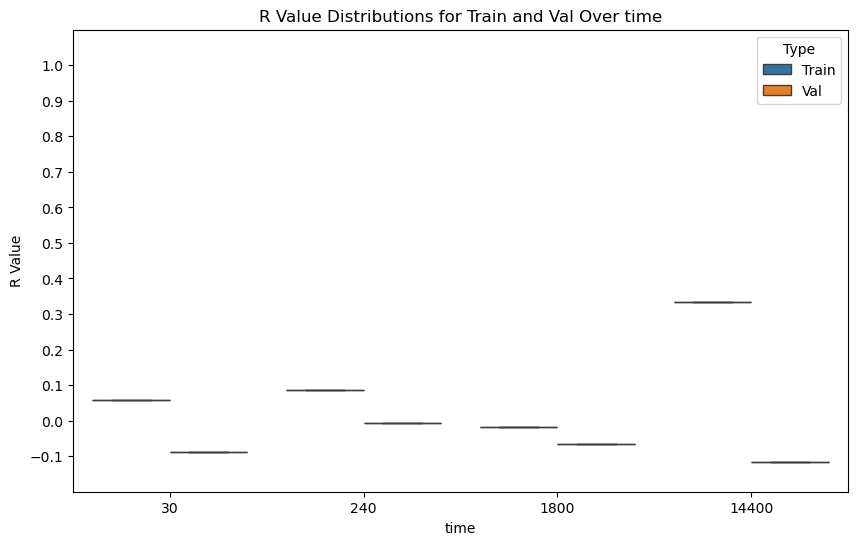

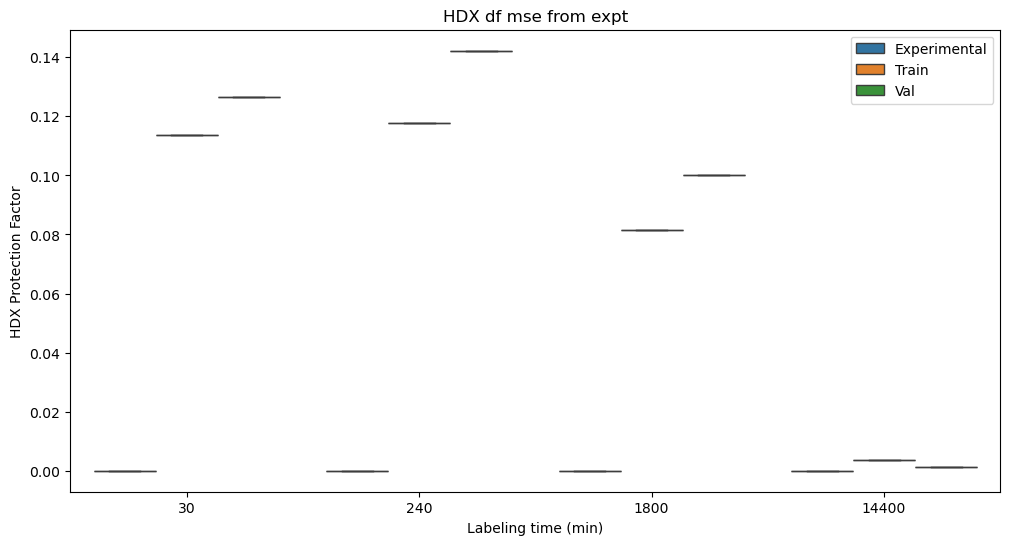

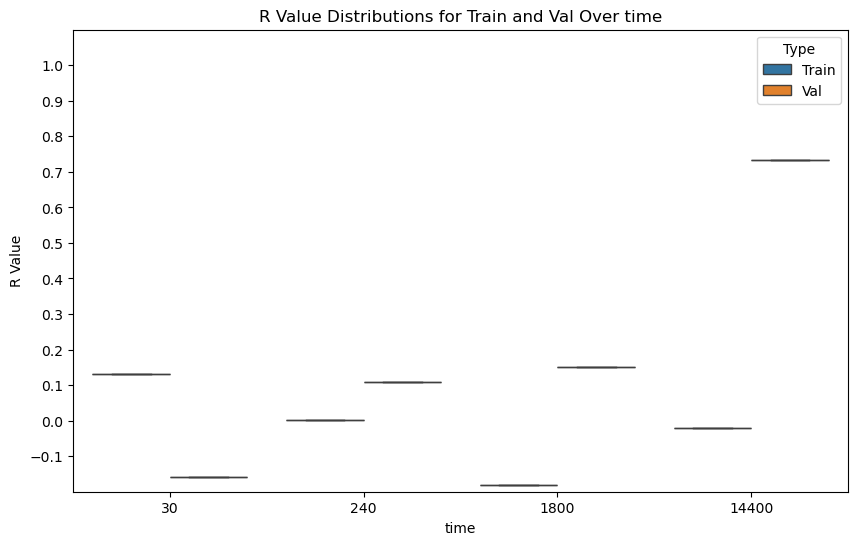

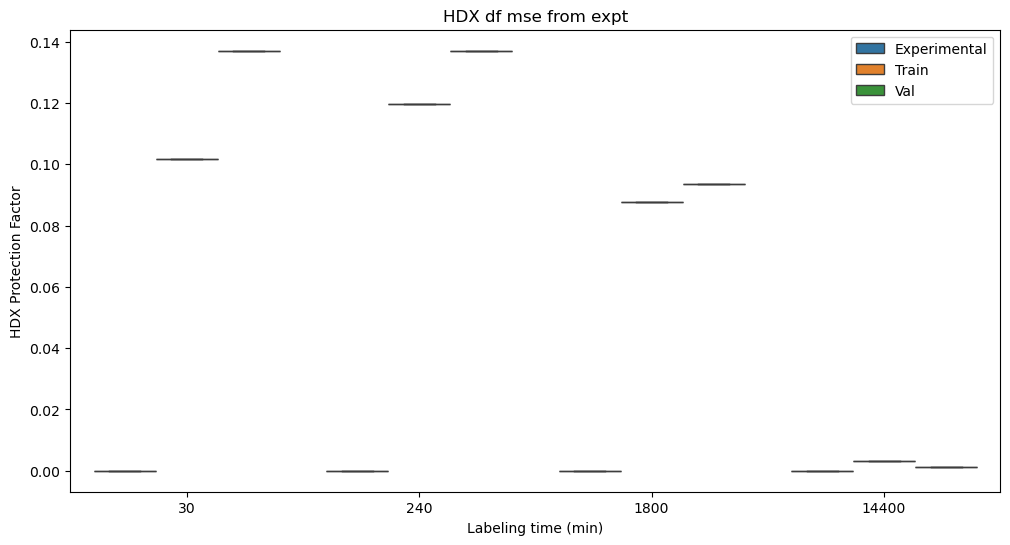

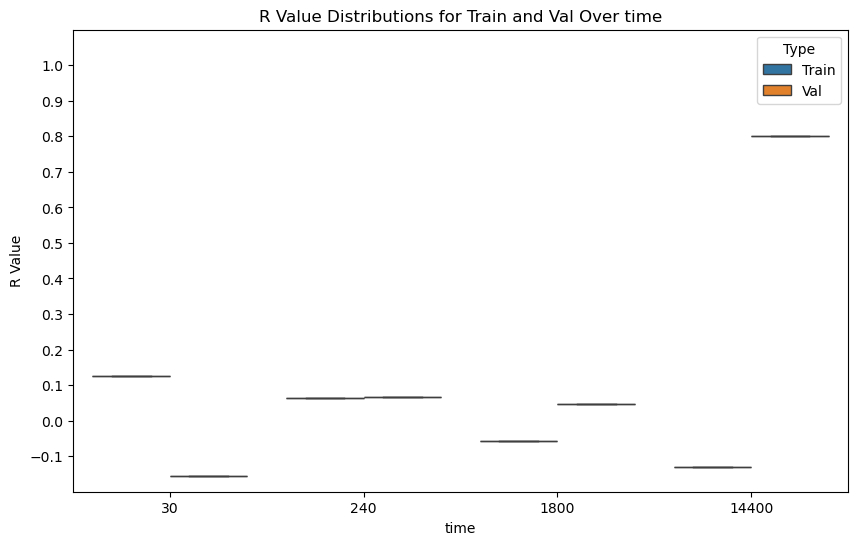

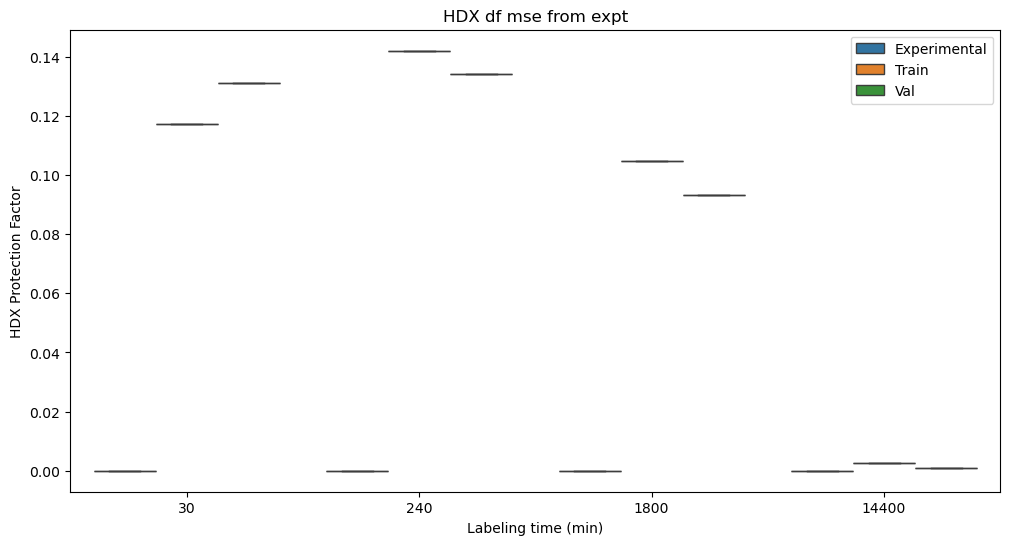

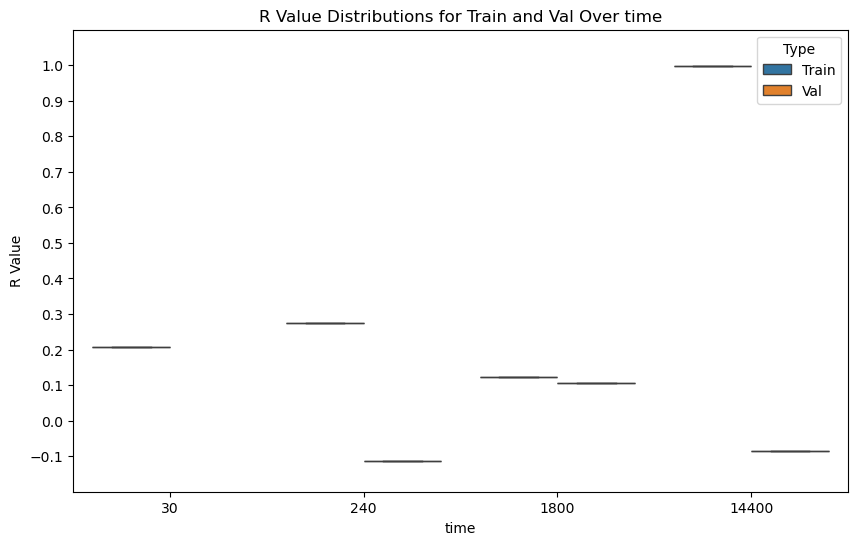

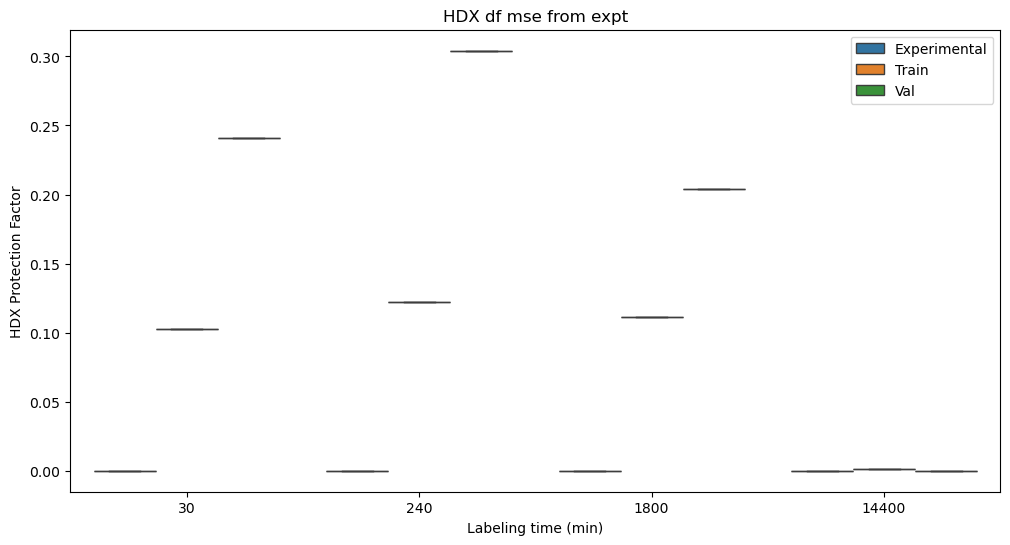

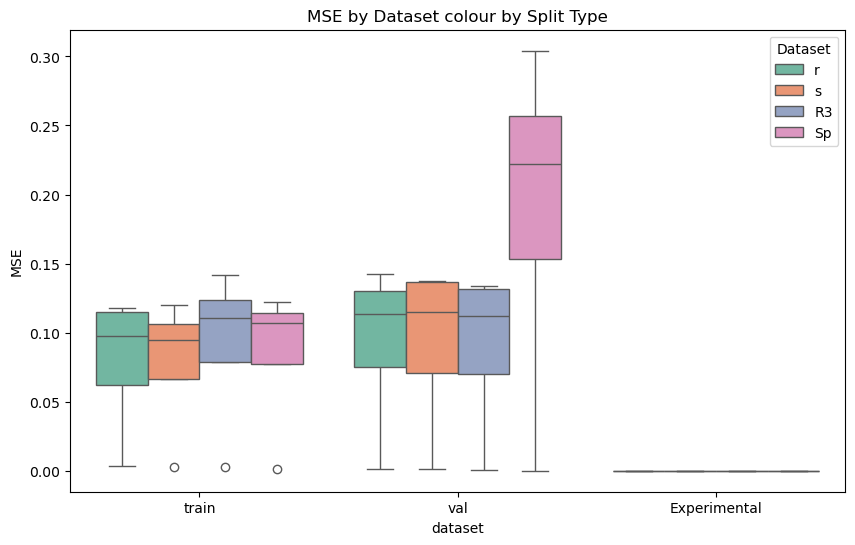

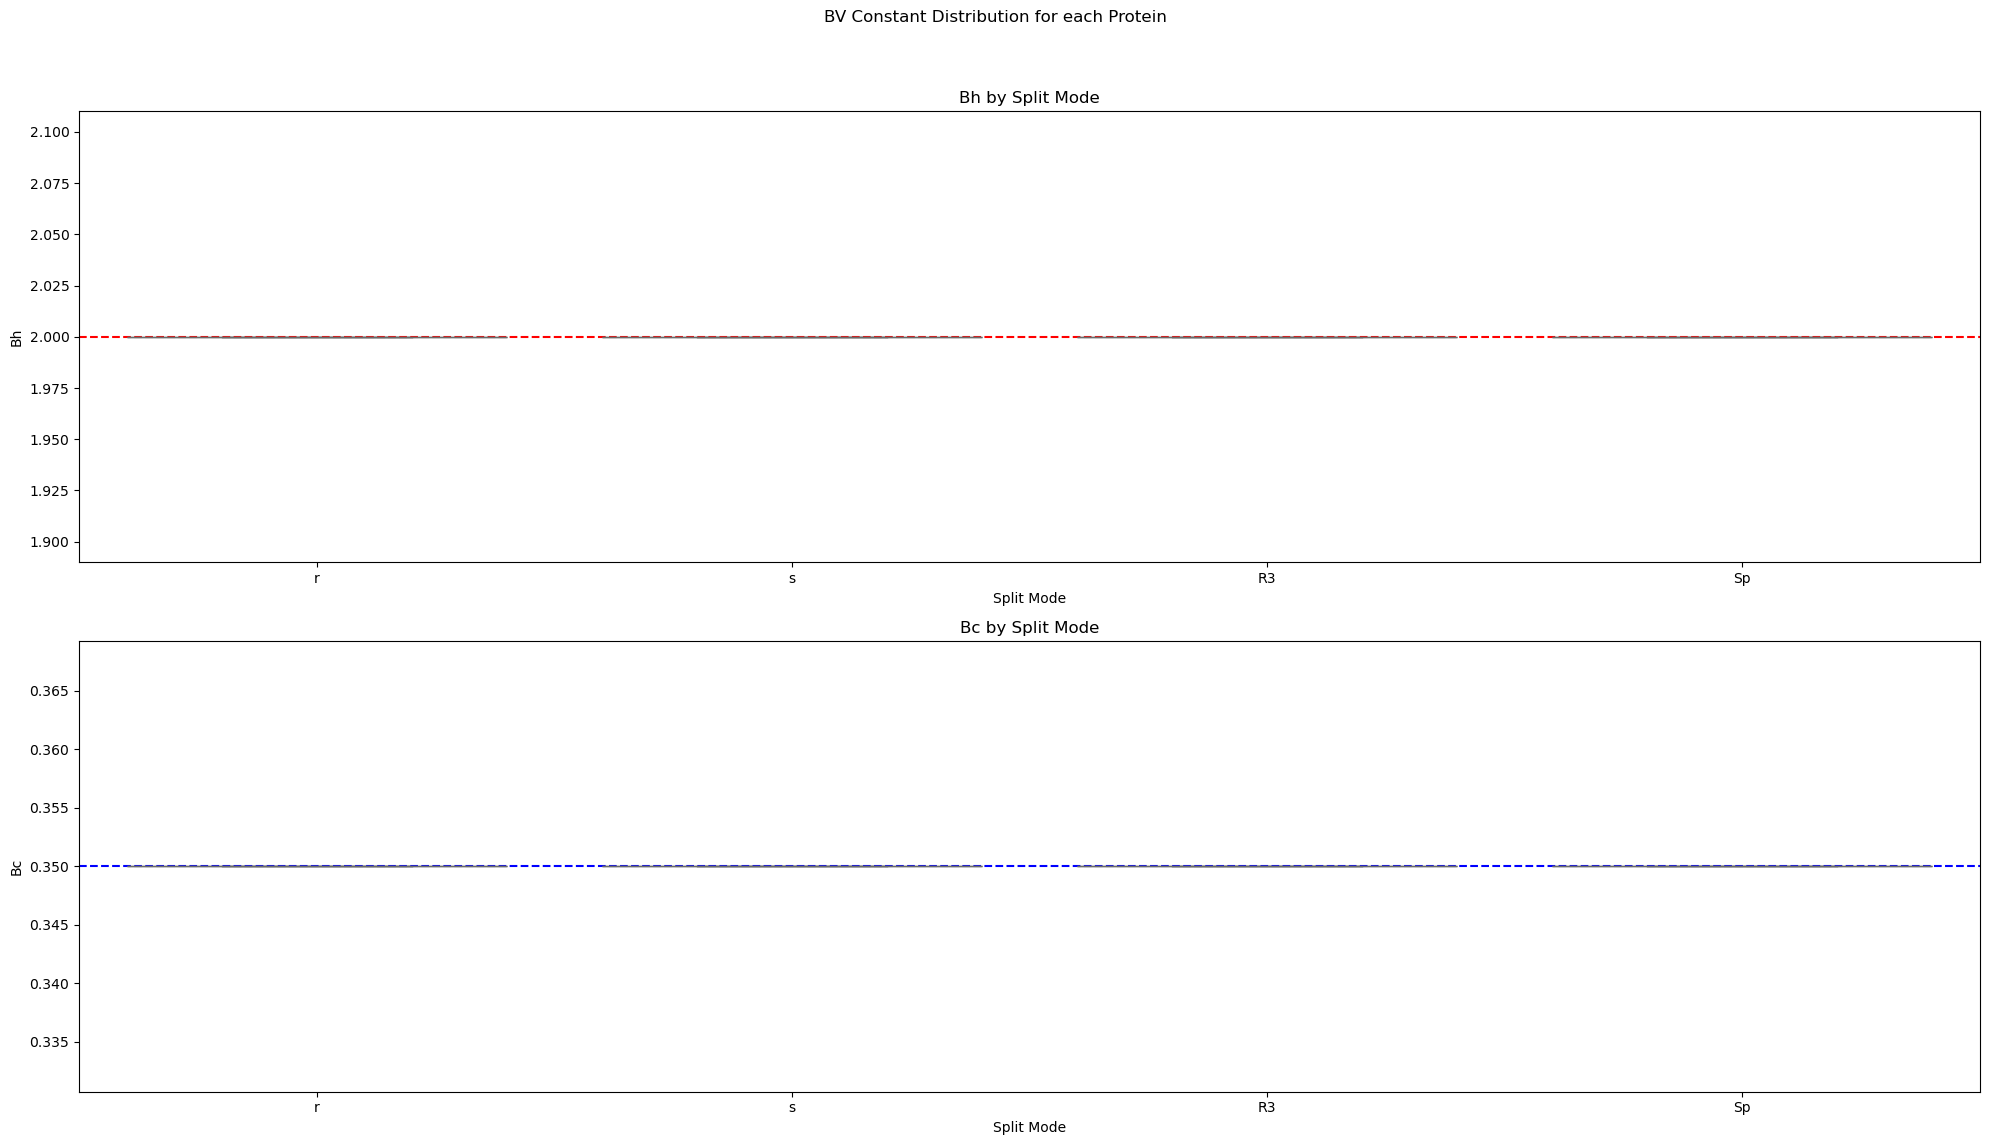

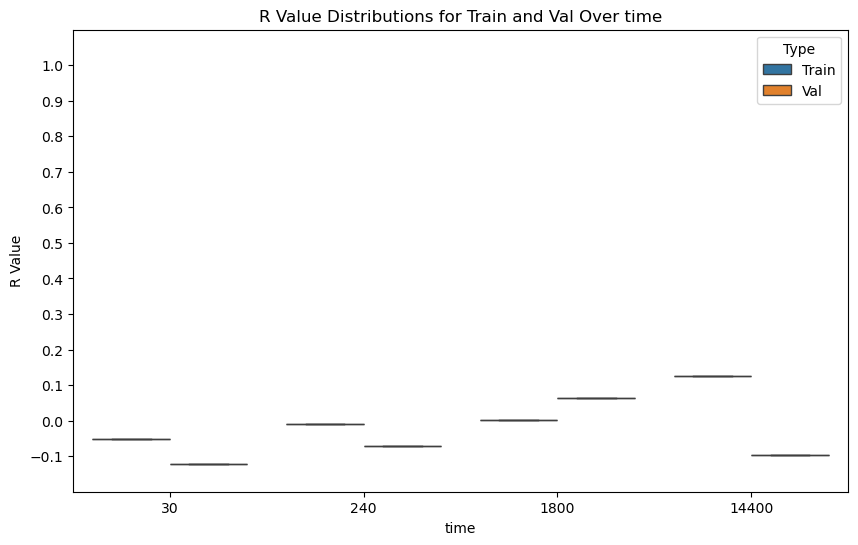

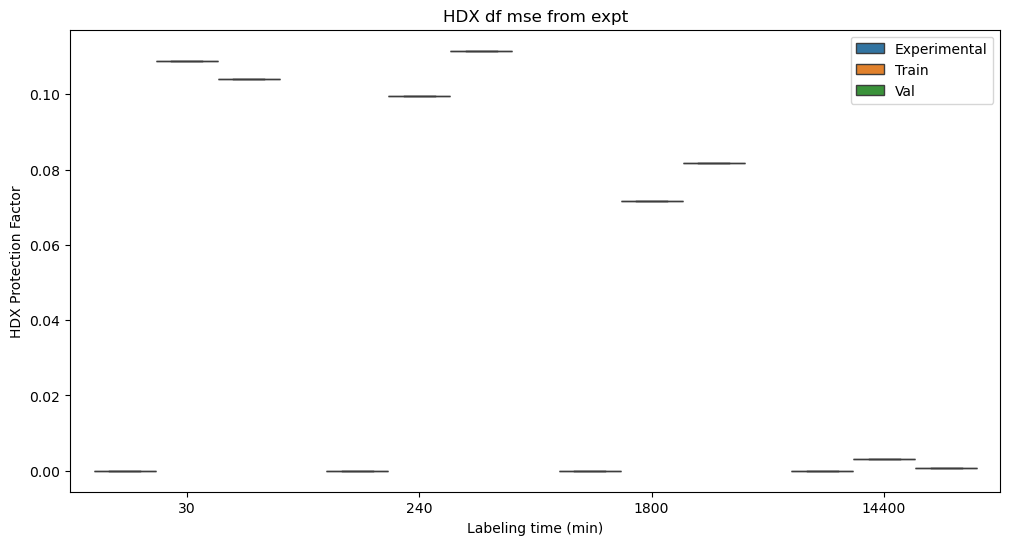

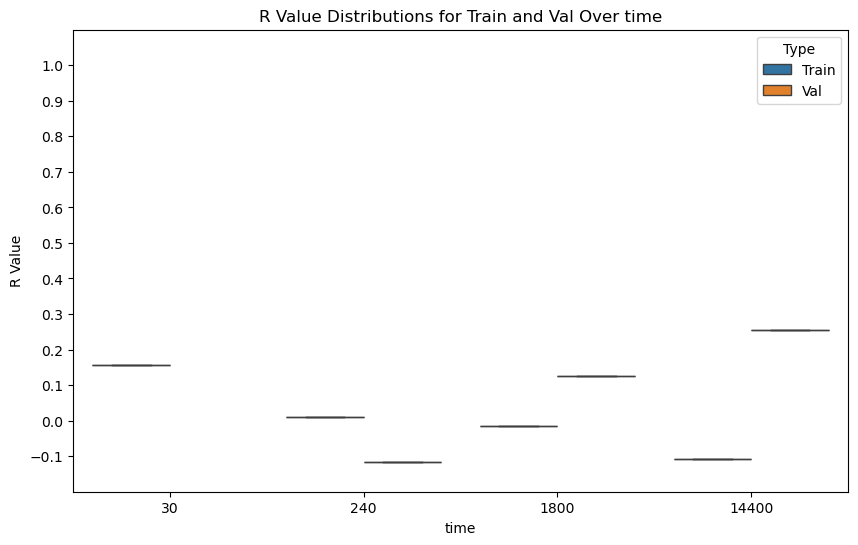

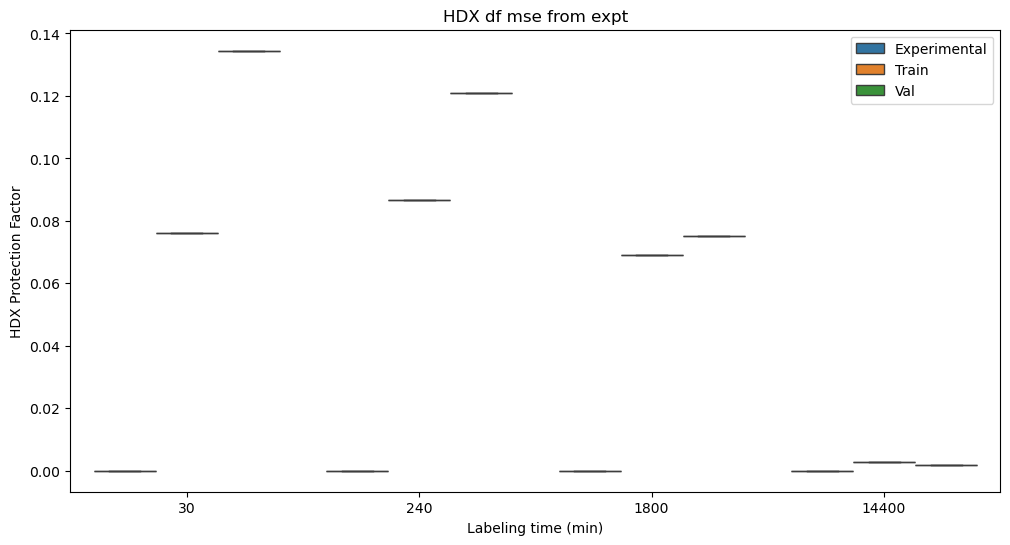

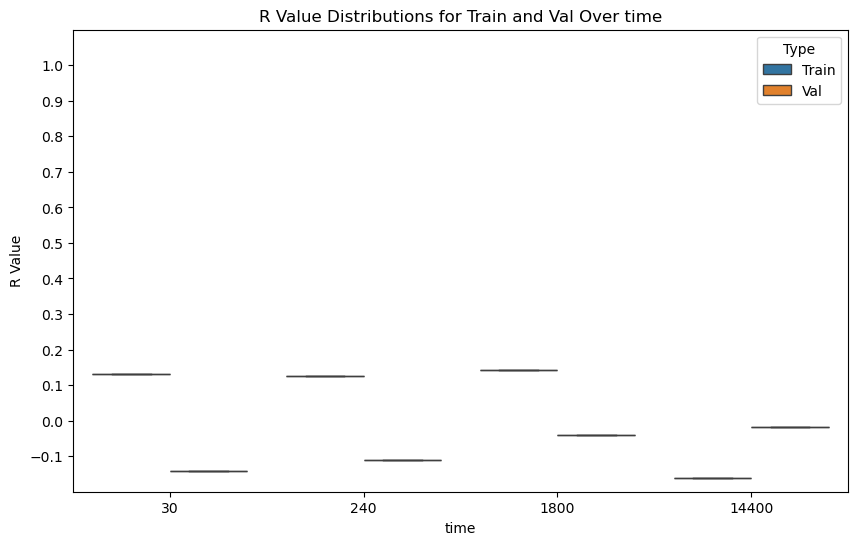

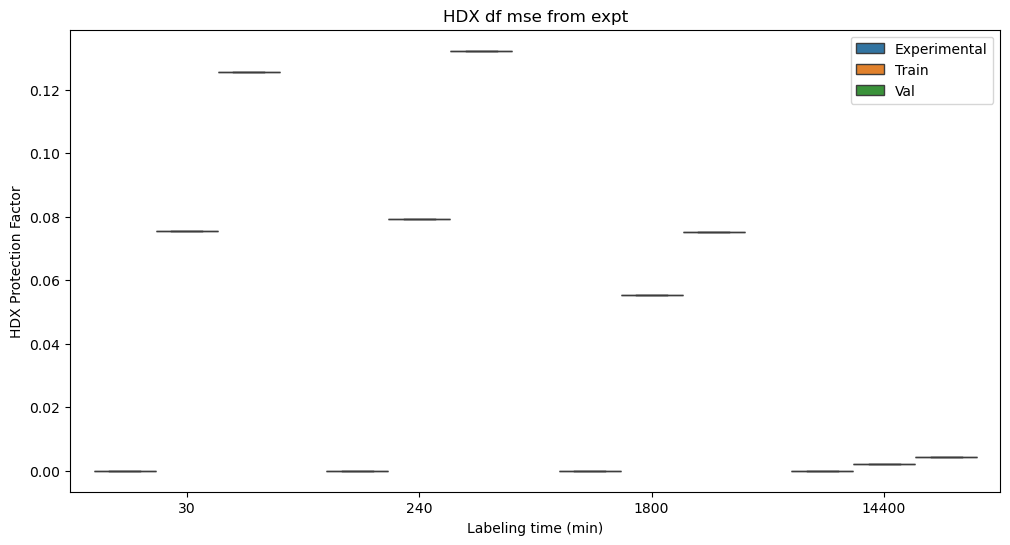

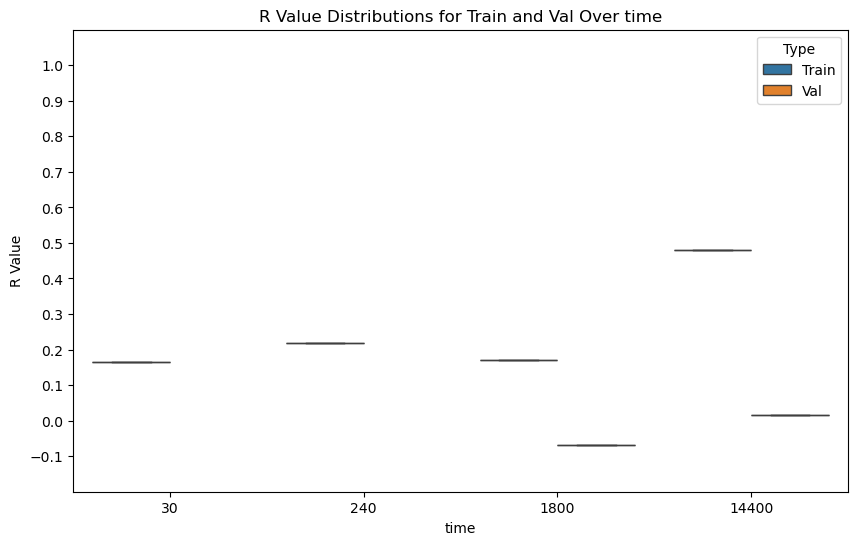

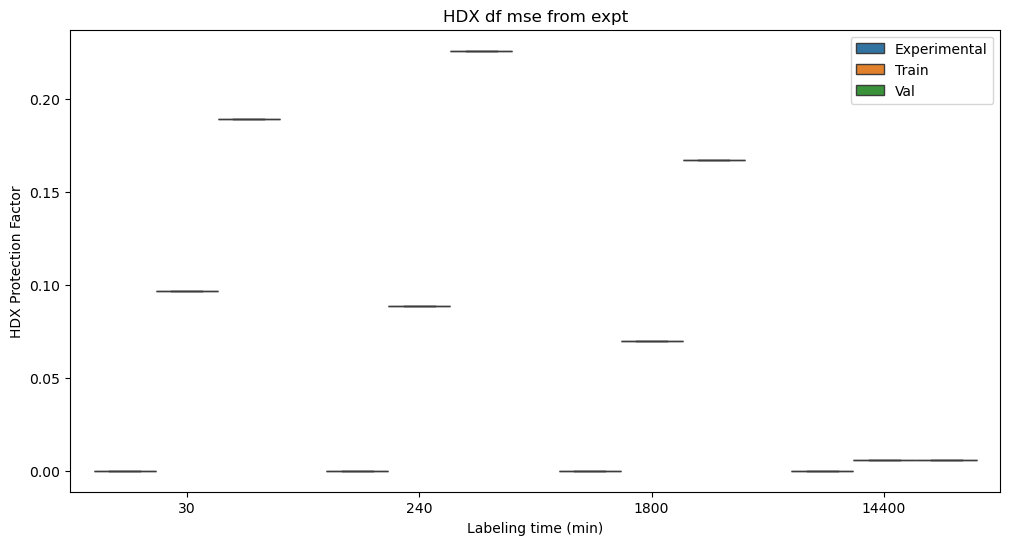

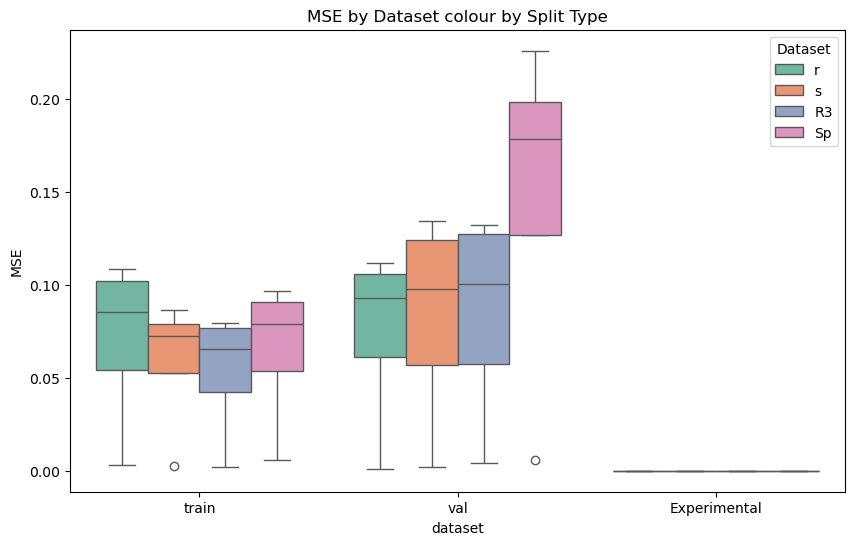

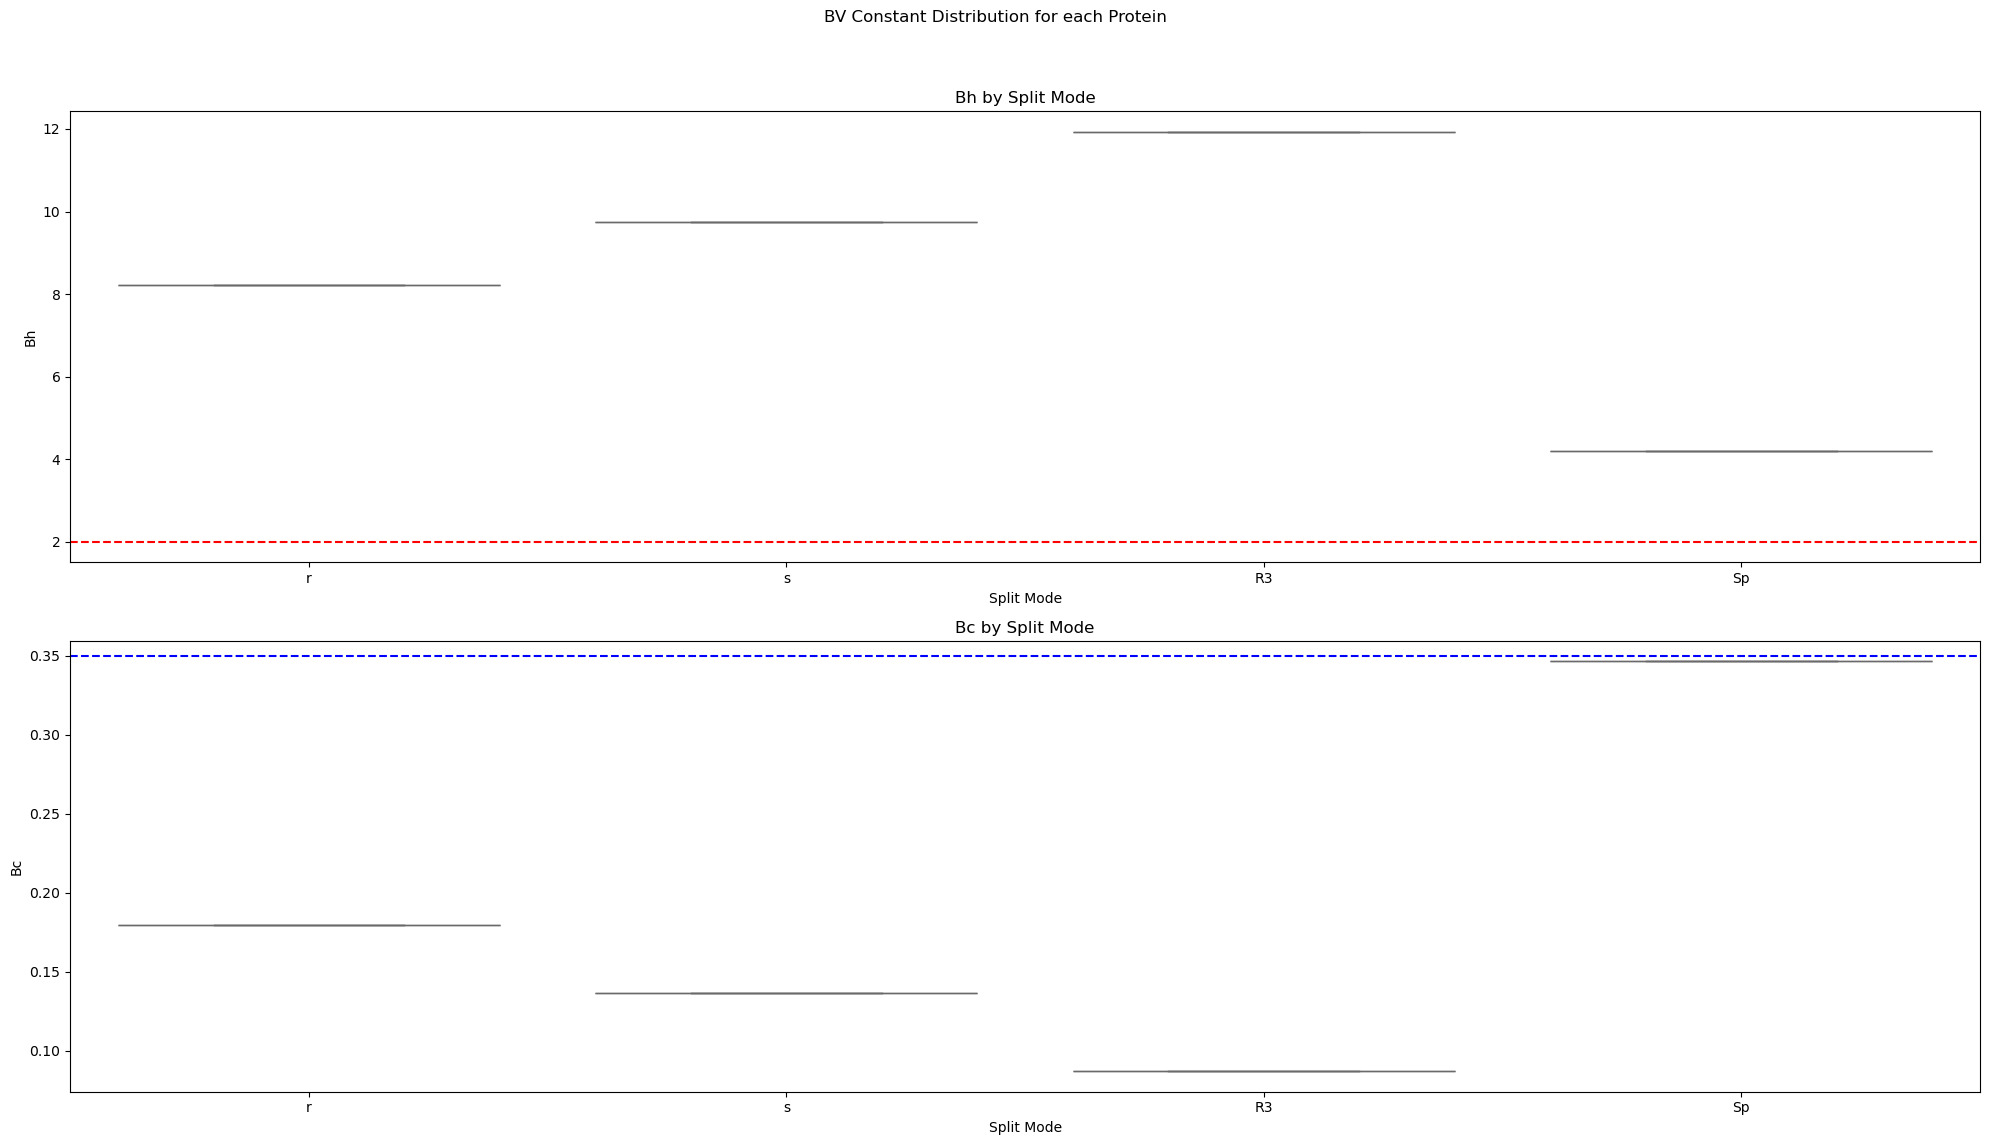

In [21]:
combined_analysis_dump, names, save_paths = VDX.run_refine_ensemble(system=test_name,
                                                                        times=[30, 240, 1800, 14400],
                                                                        expt_name=expt_name,
                                                                        n_reps=1,
                                                                        split_mode='R3',
                                                                        # RW=True,
                                                                        hdx_path=hdx_path,
                                                                        segs_path=segs_path,
                                                                        traj_paths=traj_paths,
                                                                        top_path=top_path)

In [ ]:
# # BPTI data
# BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"
# # BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"


In [ ]:
# expt_dir = os.path.join(BPTI_dir, "BPTI_expt_data")

# os.listdir(expt_dir)

# segs_name = "BPTI_residue_segs.txt"
# segs_path = os.path.join(expt_dir, segs_name)

# hdx_name = "BPTI_expt_dfracs.dat"
# hdx_path = os.path.join(expt_dir, hdx_name)
# print(hdx_path)

# rates_name = "BPTI_Intrinsic_rates.dat"
# rates_path = os.path.join(expt_dir, rates_name)


In [ ]:
# sim_name = 'BPTI_MD'

# sim_dir = os.path.join(BPTI_dir, "BPTI_simulations")

# os.listdir(sim_dir)

# md_reps = 1
# rep_dirs = ["Run_"+str(i+1) for i in range(md_reps)]

# top_name = "bpti_5pti_eq6_protonly.gro"

# top_path = os.path.join(sim_dir, rep_dirs[0], top_name)

# traj_name = "bpti_5pti_reimg_protonly.xtc"

# traj_paths = [os.path.join(sim_dir, rep_dir, traj_name) for rep_dir in rep_dirs]

# print(top_path)
# print(traj_paths)




In [ ]:
combined_analysis_dump, names, save_paths = VDX.run_benchmark_ensemble(system=test_name,
                                                                        times=[30, 240, 1800, 14400],
                                                                        expt_name=expt_name,
                                                                        n_reps=2,
                                                                        split_modes=['R3'],
                                                                        RW=True,
                                                                        hdx_path=hdx_path,
                                                                        segs_path=segs_path,
                                                                        traj_paths=traj_paths,
                                                                        top_path=top_path)

                                                                        

In [ ]:
combined_analysis_dump, names, save_paths = VDX.run_refine_ensemble(system=test_name,
                                                                        times=[30, 240, 1800, 14400],
                                                                        expt_name=expt_name,
                                                                        n_reps=1,
                                                                        # split_modes=['R3'],
                                                                        # RW=True,
                                                                        hdx_path=hdx_path,
                                                                        segs_path=segs_path,
                                                                        traj_paths=traj_paths,
                                                                        top_path=top_path)

                                                                        

In [ ]:
# def run_split_test(split_mode, name, system):

#     # settings.split_mode = 'R'
#     settings.split_mode = split_mode
#     settings.name = "_".join([name, split_mode])
#     settings.times = [30, 240, 1800, 14400,]
#     VDX = ValDXer(settings)

#     VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
#     # VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)

#     VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=test_name)

#     run_outputs = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)
#     analysis_dump, df, name = VDX.dump_analysis()
#     save_path = VDX.save_experiment()

#     return run_outputs, analysis_dump, df, name, save_path

In [ ]:

splits = ['S', 'SR', 'Sp']
split_names = ['AvsB', 'LvsX', 'mixAandB']
system = 'BPTITtut_test'

raw_run_outputs = {}
analysis_dumps = {}
analysis_df = pd.DataFrame()
names = []
save_paths = []


for split, split_name in zip(splits, split_names):
    run_outputs, analysis_dump, df, name, save_path = run_split_test(split, split_name, system)
    raw_run_outputs[name] = run_outputs
    analysis_dumps.update(analysis_dump)
    analysis_df = pd.concat([analysis_df, df])
    names.append(name)
    save_paths.append(save_path)



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('MSE over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "mse", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "MSE")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('R over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "R", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "R")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


In [ ]:
# plot LogPfs by Residues colour by calc_name facet wrap by name
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
LogPfs = pd.concat([analysis_dumps[i]["LogPfs"] for i in names])

print(LogPfs)

LogPfs_df = LogPfs.explode(['LogPf','Residues'])


# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(LogPfs_df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('LogPfs over Residues for each Named Split Mode')

# Create lineplots
g = g.map(sns.lineplot, "Residues", "LogPf", "calc_name", palette="Set2")

# Adding some additional options for better visualization
g.add_legend(title='calc_name')
g.set_axis_labels("Residues", "LogPf")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


In [ ]:
# from MDAnalysis.analysis.dssp import DSSP



In [ ]:
# VDX.paths.head()

In [ ]:
# print(top_path)

In [ ]:
# pdb_test = mda.Universe(top_path)

# # write out as a pdb and add header
# pdb_test.atoms.write('test.pdb')
# with open('test.pdb', 'r') as original: data = original.read()
# with open('test.pdb', 'w') as modified: modified.write('HEADER    '+sim_name+'\n'+data)



In [ ]:


# def PDB_to_DSSP(top_path: str, dssp_path: str=None, sim_name: str=None):
#     """
#     Run DSSP on a PDB file to generate a DSSP file. Reads the output and returns a list of secondary structure elements.
#     Secondary structure elements are reduced to a single character: H (alpha helix), S (beta sheet), or L (loop).
#     Args:
#     - top_path (str): The path to the topology file to create the PDB file from.
#     - dssp_path (str): The path to save the DSSP file.
#     - sim_name (str): Simulation name to be included in the HEADER of the PDB file.
#     Returns:
#     - List of tuples, each containing the residue number and its secondary structure element.
#     """
#     temp_pdb = "do_mkdssp.pdb"

#     if sim_name is None:
#         sim_name = "DSSP HEADER"
#     if dssp_path is None:
#         dssp_path = "dssp_file.dssp"
#     print(top_path)
#     pdb_test = mda.Universe(top_path)

#     # write out as a pdb and add header
#     pdb_test.atoms.write(temp_pdb)


#     with open(temp_pdb, 'r') as original: data = original.read()
#     with open(temp_pdb, 'w') as modified: modified.write('HEADER    '+sim_name+'\n'+data)

#     # Run mkdssp to generate DSSP file
#     try:
#         subprocess.run(['mkdssp', temp_pdb,  dssp_path], check=True)
#     except subprocess.CalledProcessError as e:
#         print(f"Error running DSSP: {e}")
#         return []

#     # Parse the DSSP file
#     secondary_structures = []
#     with open(dssp_path, 'r') as dssp_file:
#         # Skip header lines
#         for line in dssp_file:
#             if line.startswith('  #  RESIDUE AA'):
#                 break
#         # Read the secondary structure assignments
#         for line in dssp_file:
#             if len(line) > 13:  # Ensure line has enough data
#                 residue_num = line[5:10].strip()
#                 ss = line[16]
#                 # Simplify the secondary structure to H, S, or L
#                 if ss in 'GHI':
#                     ss = 'H'  # Helix
#                 elif ss in 'EB':
#                     ss = 'S'  # Sheet
#                 else:
#                     ss = 'L'  # Loop or other
#                 secondary_structures.append((residue_num, ss))

#     # Cleanup temp PDB file
#     os.remove(temp_pdb)
#     os.remove(dssp_path)
#     print(len(secondary_structures))
#     print(len(pdb_test.residues))
#     return secondary_structures

